In [249]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import seaborn as sns


# **_Reading the dataset_**

In [149]:
excel=pd.ExcelFile('/kaggle/input/mydata/E-commerce_data.xlsx')
excel.sheet_names

['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants']

In [150]:
file_path = '/kaggle/input/mydata/E-commerce_data.xlsx'


customers = pd.read_excel(file_path, sheet_name='customers')
genders = pd.read_excel(file_path, sheet_name='genders')
cities = pd.read_excel(file_path, sheet_name='cities')
transactions = pd.read_excel(file_path, sheet_name='transactions')
branches = pd.read_excel(file_path, sheet_name='branches')
merchants = pd.read_excel(file_path, sheet_name='merchants')

customers.head(3)

customer_id  join_date  city_id  gender_id
0            1 2022-01-08        7          1
1            2 2023-05-02       20          2
2            3 2023-05-14       15          1

* # Merging the dataset

In [151]:
customers_merged = pd.merge(customers, genders, how='left', on='gender_id')
customers_merged.head(3)

customer_id  join_date  city_id  gender_id gender_name
0            1 2022-01-08        7          1        Male
1            2 2023-05-02       20          2      Female
2            3 2023-05-14       15          1        Male

* CITIES
* TRANSACTION
* CUSTOMERS

In [152]:
# Merge customers with cities on city_id
customers_merged = pd.merge(customers_merged, cities, how='left', on='city_id')
customers_merged.head(3)

customer_id  join_date  city_id  gender_id gender_name city_name
0            1 2022-01-08        7          1        Male  Mansoura
1            2 2023-05-02       20          2      Female     Sohag
2            3 2023-05-14       15          1        Male     Aswan

In [153]:

customers_merged = pd.merge(customers_merged, transactions, how='left', on='customer_id')
customers_merged.head(3)

customer_id  join_date  city_id  gender_id gender_name city_name  \
0            1 2022-01-08        7          1        Male  Mansoura   
1            1 2022-01-08        7          1        Male  Mansoura   
2            1 2022-01-08        7          1        Male  Mansoura   

   transaction_id transaction_date transaction_status coupon_name  burn_date  \
0           178.0       2022-07-30         subscribed     SrP-866        NaT   
1           257.0       2022-09-19             burned     krI-075 2022-11-05   
2          1652.0       2022-06-09             burned     quk-137 2022-07-19   

   branch_id  
0        8.0  
1        1.0  
2        6.0

In [154]:
customers_merged.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'city_name', 'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'burn_date', 'branch_id'],
      dtype='object')

In [155]:
customers_merged.shape

(5011, 12)

* # Checking Nulls

In [156]:
customers_merged.isnull().sum()

customer_id              0
join_date                0
city_id                  0
gender_id                0
gender_name              0
city_name                0
transaction_id          11
transaction_date        11
transaction_status      11
coupon_name             11
burn_date             2495
branch_id               11
dtype: int64

In [157]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5011 non-null   int64         
 1   join_date           5011 non-null   datetime64[ns]
 2   city_id             5011 non-null   int64         
 3   gender_id           5011 non-null   int64         
 4   gender_name         5011 non-null   object        
 5   city_name           5011 non-null   object        
 6   transaction_id      5000 non-null   float64       
 7   transaction_date    5000 non-null   datetime64[ns]
 8   transaction_status  5000 non-null   object        
 9   coupon_name         5000 non-null   object        
 10  burn_date           2516 non-null   datetime64[ns]
 11  branch_id           5000 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 469.9+ KB


In [158]:
customers_merged.drop(columns=['burn_date'], inplace=True)

In [159]:
customers_merged.shape

(5011, 11)

In [160]:

customers_merged.dropna(inplace=True)
customers_merged.shape

(5000, 11)

In [161]:
customers_merged.isnull().sum()

customer_id           0
join_date             0
city_id               0
gender_id             0
gender_name           0
city_name             0
transaction_id        0
transaction_date      0
transaction_status    0
coupon_name           0
branch_id             0
dtype: int64

# **_Feature Engineering Part_**

In [162]:
df=customers_merged.copy()

In [163]:
df.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'city_name', 'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'branch_id'],
      dtype='object')

# **_A)Total Transactions per Customer_**

In [164]:
df['total_transactions'] = df.groupby('customer_id')['transaction_id'].transform('count')


In [165]:
df.shape

(5000, 12)

In [166]:
df.head(5)

customer_id  join_date  city_id  gender_id gender_name city_name  \
0            1 2022-01-08        7          1        Male  Mansoura   
1            1 2022-01-08        7          1        Male  Mansoura   
2            1 2022-01-08        7          1        Male  Mansoura   
3            1 2022-01-08        7          1        Male  Mansoura   
4            1 2022-01-08        7          1        Male  Mansoura   

   transaction_id transaction_date transaction_status coupon_name  branch_id  \
0           178.0       2022-07-30         subscribed     SrP-866        8.0   
1           257.0       2022-09-19             burned     krI-075        1.0   
2          1652.0       2022-06-09             burned     quk-137        6.0   
3          1929.0       2022-07-30             burned     QiG-754        8.0   
4          2352.0       2023-03-24         subscribed     OtC-985        4.0   

   total_transactions  
0                   7  
1                   7  
2                   7  
3                   7  
4                   7

# **_B)Coupon Usage Count per Customer_**

In [167]:
df['coupon_usage_count'] = df.groupby('customer_id')['coupon_name'].transform(lambda x: x.notna().sum())
df.head(5)

customer_id  join_date  city_id  gender_id gender_name city_name  \
0            1 2022-01-08        7          1        Male  Mansoura   
1            1 2022-01-08        7          1        Male  Mansoura   
2            1 2022-01-08        7          1        Male  Mansoura   
3            1 2022-01-08        7          1        Male  Mansoura   
4            1 2022-01-08        7          1        Male  Mansoura   

   transaction_id transaction_date transaction_status coupon_name  branch_id  \
0           178.0       2022-07-30         subscribed     SrP-866        8.0   
1           257.0       2022-09-19             burned     krI-075        1.0   
2          1652.0       2022-06-09             burned     quk-137        6.0   
3          1929.0       2022-07-30             burned     QiG-754        8.0   
4          2352.0       2023-03-24         subscribed     OtC-985        4.0   

   total_transactions  coupon_usage_count  
0                   7                   7  
1                   7                   7  
2                   7                   7  
3                   7                   7  
4                   7                   7

In [168]:
df.shape

(5000, 13)

In [169]:
for column in df.columns:
    duplicates = df[column].duplicated().sum()
    print(f"Column '{column}' has {duplicates} duplicate values.")

Column 'customer_id' has 4011 duplicate values.
Column 'join_date' has 4352 duplicate values.
Column 'city_id' has 4980 duplicate values.
Column 'gender_id' has 4998 duplicate values.
Column 'gender_name' has 4998 duplicate values.
Column 'city_name' has 4980 duplicate values.
Column 'transaction_id' has 0 duplicate values.
Column 'transaction_date' has 4115 duplicate values.
Column 'transaction_status' has 4998 duplicate values.
Column 'coupon_name' has 0 duplicate values.
Column 'branch_id' has 4990 duplicate values.
Column 'total_transactions' has 4986 duplicate values.
Column 'coupon_usage_count' has 4986 duplicate values.


In [170]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values.")
        print(f"Unique values: {unique_values}")  # Display first 10 unique values to avoid too much output
        print("-" * 50)

# Call the function on the DataFrame
print_unique_values(df)

Column 'customer_id' has 989 unique values.
Unique values: [   1    2    3    4    5    6    7    8   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29
   30   31   32   33   35   36   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87
   88   89   90   91   92   93   94   95   96   97   98   99  100  101
  102  103  104  105  106  107  108  109  110  111  112  113  114  115
  116  117  118  119  120  121  122  123  124  125  126  127  128  129
  130  131  132  133  134  135  136  137  138  139  140  141  142  143
  144  145  146  147  148  149  150  151  152  153  154  155  156  157
  158  159  160  161  162  163  164  165  166  167  168  169  170  171
  172  173  174  175  176  177  178  179  180  181  182  183  184  185
  186  187  188  1

In [171]:
df.isnull().sum()

customer_id           0
join_date             0
city_id               0
gender_id             0
gender_name           0
city_name             0
transaction_id        0
transaction_date      0
transaction_status    0
coupon_name           0
branch_id             0
total_transactions    0
coupon_usage_count    0
dtype: int64

In [172]:
customers_merged2=df.copy()
customers_merged2.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'city_name', 'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'branch_id', 'total_transactions', 'coupon_usage_count'],
      dtype='object')

In [173]:
columns_to_drop = [
    'customer_id',
    'city_name',    
    'gender_name',    
    'coupon_name',     
    'transaction_id',  
]

# Drop the columns from the DataFrame
customers_merged2.drop(columns=columns_to_drop, inplace=True)

# Optional: Verify the columns were dropped
print(customers_merged2.columns)

Index(['join_date', 'city_id', 'gender_id', 'transaction_date',
       'transaction_status', 'branch_id', 'total_transactions',
       'coupon_usage_count'],
      dtype='object')


In [174]:
customers_merged2['join_date'] = pd.to_datetime(customers_merged2['join_date'], errors='coerce')
customers_merged2['transaction_date'] = pd.to_datetime(customers_merged2['transaction_date'], errors='coerce')


customers_merged2['join_year'] = customers_merged2['join_date'].dt.year
customers_merged2['join_month'] = customers_merged2['join_date'].dt.month
customers_merged2['join_day'] = customers_merged2['join_date'].dt.day

customers_merged2['transaction_year'] = customers_merged2['transaction_date'].dt.year
customers_merged2['transaction_month'] = customers_merged2['transaction_date'].dt.month
customers_merged2['transaction_day'] = customers_merged2['transaction_date'].dt.day


customers_merged2.drop(columns=['join_date', 'transaction_date'], inplace=True)

customers_merged2.head()


city_id  gender_id transaction_status  branch_id  total_transactions  \
0        7          1         subscribed        8.0                   7   
1        7          1             burned        1.0                   7   
2        7          1             burned        6.0                   7   
3        7          1             burned        8.0                   7   
4        7          1         subscribed        4.0                   7   

   coupon_usage_count  join_year  join_month  join_day  transaction_year  \
0                   7       2022           1         8              2022   
1                   7       2022           1         8              2022   
2                   7       2022           1         8              2022   
3                   7       2022           1         8              2022   
4                   7       2022           1         8              2023   

   transaction_month  transaction_day  
0                  7               30  
1                  9               19  
2                  6                9  
3                  7               30  
4                  3               24

In [175]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values.")
        print(f"Unique values: {unique_values}")  # Display first 10 unique values to avoid too much output
        print("-" * 50)

# Call the function on the DataFrame
print_unique_values(customers_merged2)

Column 'city_id' has 20 unique values.
Unique values: [ 7 20 15 11  8 19  4  3  2 12  6  1 17 10 16  5  9 14 18 13]
--------------------------------------------------
Column 'gender_id' has 2 unique values.
Unique values: [1 2]
--------------------------------------------------
Column 'transaction_status' has 2 unique values.
Unique values: ['subscribed' 'burned']
--------------------------------------------------
Column 'branch_id' has 10 unique values.
Unique values: [ 8.  1.  6.  4.  2.  7. 10.  3.  5.  9.]
--------------------------------------------------
Column 'total_transactions' has 14 unique values.
Unique values: [ 7  3  5  1  4  8  2  9 10  6 12 11 13 14]
--------------------------------------------------
Column 'coupon_usage_count' has 14 unique values.
Unique values: [ 7  3  5  1  4  8  2  9 10  6 12 11 13 14]
--------------------------------------------------
Column 'join_year' has 4 unique values.
Unique values: [2022 2023 2024 2021]
------------------------------------

In [176]:
customers_merged3=customers_merged2.copy()

In [177]:
customers_merged2['year_match'] = customers_merged2['transaction_year'] == customers_merged2['join_year']

year_mismatch_count = (~customers_merged2['year_match']).sum()

if year_mismatch_count == 0:
    print("All values in 'transaction_year' match 'join_year'. You can drop one of them.")
else:
    print(f"There are {year_mismatch_count} mismatches. You should keep both columns.")

year_mismatched_rows = customers_merged2[~customers_merged2['year_match']]
print("Mismatched rows:")
print(year_mismatched_rows[['join_year', 'transaction_year']])

There are 2893 mismatches. You should keep both columns.
Mismatched rows:
      join_year  transaction_year
4          2022              2023
6          2022              2024
10         2023              2024
12         2023              2024
13         2023              2024
...         ...               ...
4998       2022              2024
4999       2022              2023
5005       2022              2023
5006       2022              2023
5008       2022              2024

[2893 rows x 2 columns]


In [178]:
customers_merged2['month_match'] = customers_merged2['transaction_month'] == customers_merged2['join_month']

# Count the number of rows where months do not match
mismatch_count = (~customers_merged2['month_match']).sum()

# Print the result
if mismatch_count == 0:
    print("All values in 'transaction_month' match 'join_month'. You can drop one of them.")
else:
    print(f"There are {mismatch_count} mismatches. You should keep both columns.")

# Optionally, display mismatched rows for further inspection
mismatched_rows = customers_merged2[~customers_merged2['month_match']]
print("Mismatched rows:")
print(mismatched_rows[['join_month', 'transaction_month']])

There are 4393 mismatches. You should keep both columns.
Mismatched rows:
      join_month  transaction_month
0              1                  7
1              1                  9
2              1                  6
3              1                  7
4              1                  3
...          ...                ...
5003           3                  4
5004           3                  5
5006           7                  5
5007           7                 12
5008           7                  4

[4393 rows x 2 columns]


In [179]:
customers_merged2['day_match'] = customers_merged2['transaction_day'] == customers_merged2['join_day']

day_mismatch_count = (~customers_merged2['day_match']).sum()

if day_mismatch_count == 0:
    print("All values in 'transaction_day' match 'join_day'. You can drop one of them.")
else:
    print(f"There are {day_mismatch_count} mismatches. You should keep both columns.")

day_mismatched_rows = customers_merged2[~customers_merged2['day_match']]
print("Mismatched rows:")
print(day_mismatched_rows[['join_day', 'transaction_day']])

There are 4829 mismatches. You should keep both columns.
Mismatched rows:
      join_day  transaction_day
0            8               30
1            8               19
2            8                9
3            8               30
4            8               24
...        ...              ...
5006        16               18
5007        16               21
5008        16                9
5009         8               20
5010         8               27

[4829 rows x 2 columns]


In [180]:
customers_merged2.columns


Index(['city_id', 'gender_id', 'transaction_status', 'branch_id',
       'total_transactions', 'coupon_usage_count', 'join_year', 'join_month',
       'join_day', 'transaction_year', 'transaction_month', 'transaction_day',
       'year_match', 'month_match', 'day_match'],
      dtype='object')

In [181]:
year_mapping = {2021: 0, 2022: 1, 2023: 2, 2024: 3}
customers_merged2['join_year'] = customers_merged2['join_year'].map(year_mapping)
customers_merged2['transaction_year'] = customers_merged2['transaction_year'].map(year_mapping)


In [182]:
customers_merged2.head()

city_id  gender_id transaction_status  branch_id  total_transactions  \
0        7          1         subscribed        8.0                   7   
1        7          1             burned        1.0                   7   
2        7          1             burned        6.0                   7   
3        7          1             burned        8.0                   7   
4        7          1         subscribed        4.0                   7   

   coupon_usage_count  join_year  join_month  join_day  transaction_year  \
0                   7          1           1         8                 1   
1                   7          1           1         8                 1   
2                   7          1           1         8                 1   
3                   7          1           1         8                 1   
4                   7          1           1         8                 2   

   transaction_month  transaction_day  year_match  month_match  day_match  
0                  7               30        True        False      False  
1                  9               19        True        False      False  
2                  6                9        True        False      False  
3                  7               30        True        False      False  
4                  3               24       False        False      False

In [183]:
customers_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_id             5000 non-null   int64  
 1   gender_id           5000 non-null   int64  
 2   transaction_status  5000 non-null   object 
 3   branch_id           5000 non-null   float64
 4   total_transactions  5000 non-null   int64  
 5   coupon_usage_count  5000 non-null   int64  
 6   join_year           5000 non-null   int64  
 7   join_month          5000 non-null   int32  
 8   join_day            5000 non-null   int32  
 9   transaction_year    5000 non-null   int64  
 10  transaction_month   5000 non-null   int32  
 11  transaction_day     5000 non-null   int32  
 12  year_match          5000 non-null   bool   
 13  month_match         5000 non-null   bool   
 14  day_match           5000 non-null   bool   
dtypes: bool(3), float64(1), int32(4), int64(6), object(1)
memory

In [184]:
columns_to_drop = [col for col in customers_merged2.columns if '_match' in col]
customers_merged2 = customers_merged2.drop(columns=columns_to_drop)


customers_merged2['branch_id'] = customers_merged2['branch_id'].astype(int)


customers_merged2 = customers_merged2.reset_index(drop=True)

print(customers_merged2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   city_id             5000 non-null   int64 
 1   gender_id           5000 non-null   int64 
 2   transaction_status  5000 non-null   object
 3   branch_id           5000 non-null   int64 
 4   total_transactions  5000 non-null   int64 
 5   coupon_usage_count  5000 non-null   int64 
 6   join_year           5000 non-null   int64 
 7   join_month          5000 non-null   int32 
 8   join_day            5000 non-null   int32 
 9   transaction_year    5000 non-null   int64 
 10  transaction_month   5000 non-null   int32 
 11  transaction_day     5000 non-null   int32 
dtypes: int32(4), int64(7), object(1)
memory usage: 390.8+ KB
None


In [185]:
customers_merged2.columns

Index(['city_id', 'gender_id', 'transaction_status', 'branch_id',
       'total_transactions', 'coupon_usage_count', 'join_year', 'join_month',
       'join_day', 'transaction_year', 'transaction_month', 'transaction_day'],
      dtype='object')

* # Label Encoding

In [186]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


label_encoder = LabelEncoder()
customers_merged2['transaction_status'] = label_encoder.fit_transform(customers_merged2['transaction_status'])

id_columns = ['city_id', 'gender_id', 'branch_id']
for col in id_columns:
    customers_merged2[col] -= 1
    
customers_merged4=customers_merged2.copy()   

numerical_columns = [ 'join_year', 
                      'join_month', 'join_day','transaction_year', 'transaction_month', 'transaction_day','total_transactions','coupon_usage_count']


scaler = StandardScaler()


customers_merged2[numerical_columns] = scaler.fit_transform(customers_merged2[numerical_columns])


customers_merged2.head()

city_id  gender_id  transaction_status  branch_id  total_transactions  \
0        6          0                   1          7            0.407599   
1        6          0                   0          0            0.407599   
2        6          0                   0          5            0.407599   
3        6          0                   0          7            0.407599   
4        6          0                   1          3            0.407599   

   coupon_usage_count  join_year  join_month  join_day  transaction_year  \
0            0.407599  -0.578103   -1.579737 -0.838668         -1.823591   
1            0.407599  -0.578103   -1.579737 -0.838668         -1.823591   
2            0.407599  -0.578103   -1.579737 -0.838668         -1.823591   
3            0.407599  -0.578103   -1.579737 -0.838668         -1.823591   
4            0.407599  -0.578103   -1.579737 -0.838668         -0.476376   

   transaction_month  transaction_day  
0           0.330103         1.622782  
1           0.968847         0.383931  
2           0.010731        -0.742297  
3           0.330103         1.622782  
4          -0.947385         0.947045

In [187]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values.")
        print(f"Unique values: {unique_values}")  # Display first 10 unique values to avoid too much output
        print("-" * 50)

# Call the function on the DataFrame
print_unique_values(customers_merged2)

Column 'city_id' has 20 unique values.
Unique values: [ 6 19 14 10  7 18  3  2  1 11  5  0 16  9 15  4  8 13 17 12]
--------------------------------------------------
Column 'gender_id' has 2 unique values.
Unique values: [0 1]
--------------------------------------------------
Column 'transaction_status' has 2 unique values.
Unique values: [1 0]
--------------------------------------------------
Column 'branch_id' has 10 unique values.
Unique values: [7 0 5 3 1 6 9 2 4 8]
--------------------------------------------------
Column 'total_transactions' has 14 unique values.
Unique values: [ 0.40759939 -1.35919468 -0.47579764 -2.24259172 -0.91749616  0.84929791
 -1.8008932   1.29099643  1.73269495 -0.03409913  2.61609199  2.17439347
  3.05779051  3.49948903]
--------------------------------------------------
Column 'coupon_usage_count' has 14 unique values.
Unique values: [ 0.40759939 -1.35919468 -0.47579764 -2.24259172 -0.91749616  0.84929791
 -1.8008932   1.29099643  1.73269495 -0.03409

In [188]:
!pip install optuna
import optuna 

# **_Modeling Part_**

* # without pca

# **_1)Kmeans_**

**_Optuna_**

[I 2024-09-19 10:49:50,468] A new study created in memory with name: no-name-277b69c8-8fa1-448e-b2be-1508ba33576a
[I 2024-09-19 10:49:50,877] Trial 0 finished with value: 0.2685965930226119 and parameters: {'init': 'random', 'max_iter': 500}. Best is trial 0 with value: 0.2685965930226119.
[I 2024-09-19 10:49:51,280] Trial 1 finished with value: 0.2685965930226119 and parameters: {'init': 'random', 'max_iter': 500}. Best is trial 0 with value: 0.2685965930226119.
[I 2024-09-19 10:49:51,771] Trial 2 finished with value: 0.29062119348652016 and parameters: {'init': 'k-means++', 'max_iter': 450}. Best is trial 2 with value: 0.29062119348652016.
[I 2024-09-19 10:49:52,263] Trial 3 finished with value: 0.29062119348652016 and parameters: {'init': 'k-means++', 'max_iter': 450}. Best is trial 2 with value: 0.29062119348652016.
[I 2024-09-19 10:49:52,664] Trial 4 finished with value: 0.2685965930226119 and parameters: {'init': 'random', 'max_iter': 450}. Best is trial 2 with value: 0.290621193

Best initialization method: k-means++
Best max_iter: 450
Best silhouette score: 0.2906


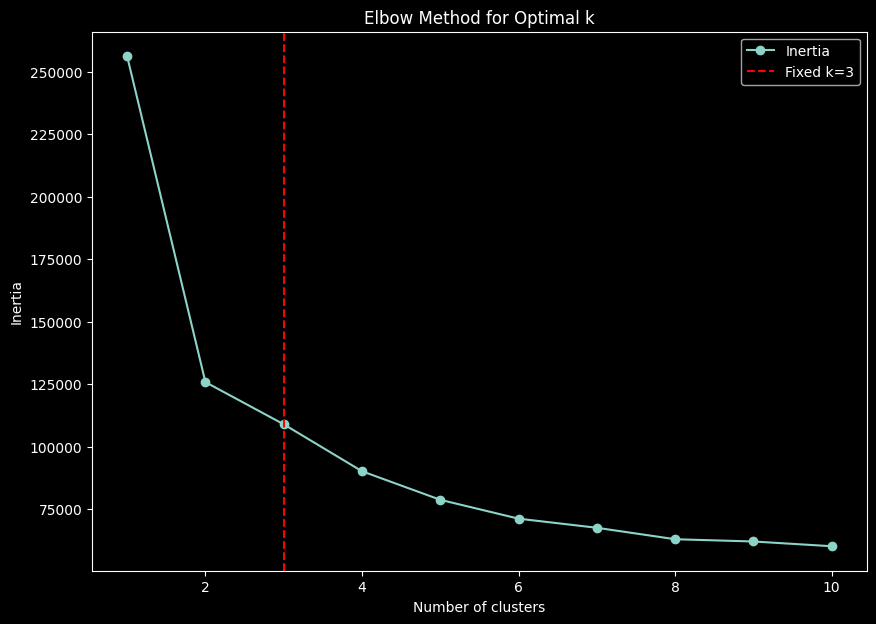

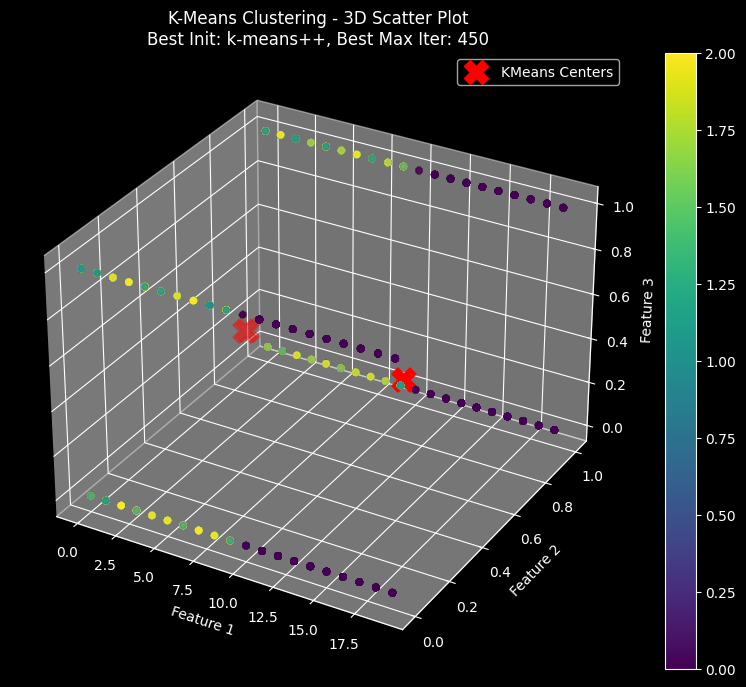

In [213]:
X = customers_merged2

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    init_method = trial.suggest_categorical('init', ['k-means++', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 500, step=50)
    
    # Apply K-Means clustering with fixed n_clusters and varying hyperparameters
    kmeans = KMeans(n_clusters=3, init=init_method, max_iter=max_iter, n_init='auto', random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Create an Optuna study to optimize the silhouette score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters and best score
print(f"Best initialization method: {study.best_params['init']}")
print(f"Best max_iter: {study.best_params['max_iter']}")
print(f"Best silhouette score: {study.best_value:.4f}")

# Apply K-Means with the best hyperparameters found
best_init = study.best_params['init']
best_max_iter = study.best_params['max_iter']
kmeans_optimal = KMeans(n_clusters=3, init=best_init, max_iter=best_max_iter, n_init='auto', random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X)

# Get cluster centers from the fitted model
kmeans_centers = kmeans_optimal.cluster_centers_

# Plot the elbow method for visual confirmation
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), inertia, marker='o', label='Inertia')
plt.axvline(x=3, color='r', linestyle='--', label='Fixed k=3')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

# 3D scatter plot for K-Means clustering results
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

# Unpack X into individual coordinates for plotting
x = X.iloc[:, 0]
y = X.iloc[:, 1]
z = X.iloc[:, 2]

# Plotting data points with clusters
scatter = ax.scatter(x, y, z, c=clusters_optimal, cmap='viridis')

# Plotting cluster centers as red 'X'
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], kmeans_centers[:, 2],
           s=300, c='red', marker='X', label='KMeans Centers')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'K-Means Clustering - 3D Scatter Plot\nBest Init: {best_init}, Best Max Iter: {best_max_iter}')
ax.legend()

# Colorbar
plt.colorbar(scatter)
plt.show()

**_Randomized Search_**

Best initialization method: k-means++
Best max_iter: 448
Best silhouette score: 0.2933


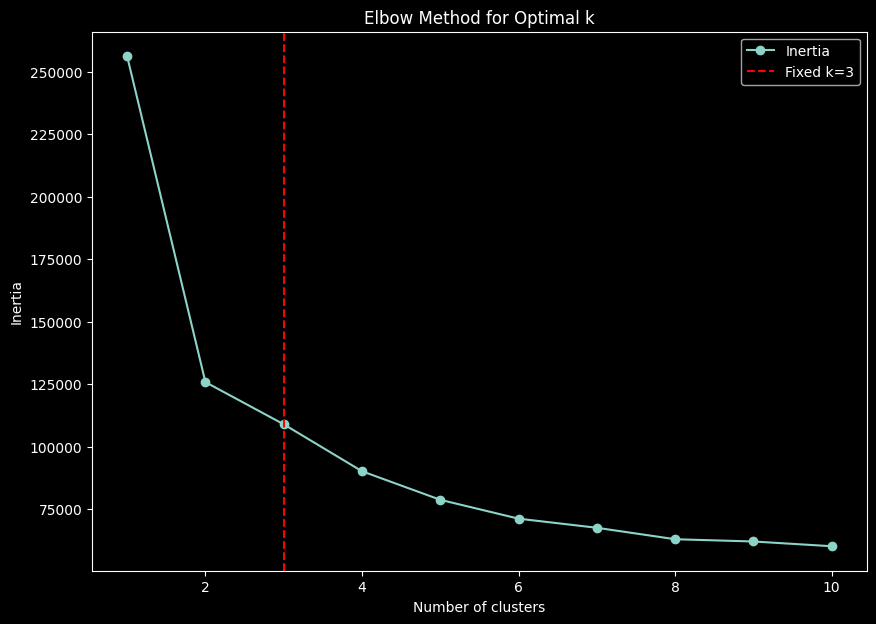

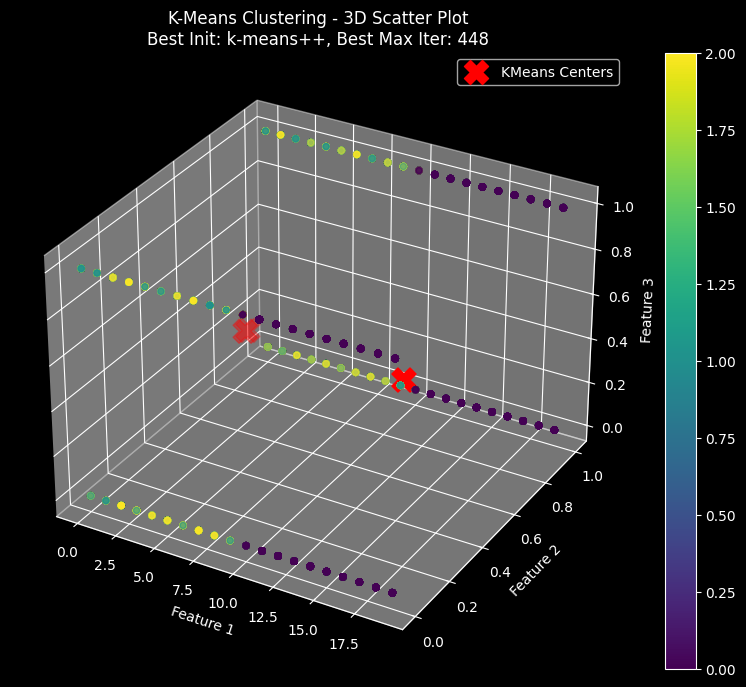

In [210]:
X = customers_merged2
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

X = customers_merged2.values  # Convert DataFrame to numpy array

# Define parameter distributions for Random Search
param_dist = {
    'init': ['k-means++', 'random'],
    'max_iter': randint(100, 500)
}

# Create a KMeans object
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Define custom scoring function for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    kmeans, 
    param_distributions=param_dist, 
    n_iter=120,  # Number of parameter settings sampled
    scoring=silhouette_scorer,  # Use custom scoring function
    n_jobs=-1, 
    cv=15,  # Cross-validation splitting strategy
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X)

# Print the best parameters and best score
print(f"Best initialization method: {random_search.best_params_['init']}")
print(f"Best max_iter: {random_search.best_params_['max_iter']}")
print(f"Best silhouette score: {random_search.best_score_:.4f}")

# Apply K-Means with the best hyperparameters found
best_init = random_search.best_params_['init']
best_max_iter = random_search.best_params_['max_iter']
kmeans_optimal = KMeans(n_clusters=3, init=best_init, max_iter=best_max_iter, n_init='auto', random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X)

# Get cluster centers from the fitted model
kmeans_centers = kmeans_optimal.cluster_centers_

# Plot the elbow method for visual confirmation
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), inertia, marker='o', label='Inertia')
plt.axvline(x=3, color='r', linestyle='--', label='Fixed k=3')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

# 3D scatter plot for K-Means clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Unpack X into individual coordinates for plotting
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plotting data points with clusters
scatter = ax.scatter(x, y, z, c=clusters_optimal, cmap='viridis')

# Plotting cluster centers as red 'X'
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], kmeans_centers[:, 2],
           s=300, c='red', marker='X', label='KMeans Centers')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'K-Means Clustering - 3D Scatter Plot\nBest Init: {best_init}, Best Max Iter: {best_max_iter}')
ax.legend()

# Colorbar
plt.colorbar(scatter)
plt.show()


# **_2)DBSCAN_**

In [123]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import optuna


X = customers_merged2

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    eps = trial.suggest_float('eps', 0.1, 1.0, step=0.1)
    min_samples = trial.suggest_int('min_samples', 2, 10)

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    if len(set(clusters)) < 2:
        return -1  # Silhouette score is not defined for < 2 clusters
    
    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Create Optuna study
study = optuna.create_study(direction='maximize')

# Optimize
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

# Apply DBSCAN with the best parameters
optimal_eps = best_params['eps']
optimal_min_samples = best_params['min_samples']
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
clusters_optimal = dbscan_optimal.fit_predict(X)

# Print number of clusters and noise points
unique_labels = np.unique(clusters_optimal)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
num_noise_points = list(clusters_optimal).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

[I 2024-09-19 08:08:23,956] A new study created in memory with name: no-name-403d33ed-8505-45ba-986f-b1ab60c2b336
[I 2024-09-19 08:08:24,050] Trial 0 finished with value: -1.0 and parameters: {'eps': 0.9, 'min_samples': 7}. Best is trial 0 with value: -1.0.
[I 2024-09-19 08:08:24,137] Trial 1 finished with value: -1.0 and parameters: {'eps': 0.9, 'min_samples': 8}. Best is trial 0 with value: -1.0.
[I 2024-09-19 08:08:24,216] Trial 2 finished with value: -1.0 and parameters: {'eps': 0.6, 'min_samples': 9}. Best is trial 0 with value: -1.0.
[I 2024-09-19 08:08:24,706] Trial 3 finished with value: -0.5951626444041502 and parameters: {'eps': 0.8, 'min_samples': 2}. Best is trial 3 with value: -0.5951626444041502.
[I 2024-09-19 08:08:24,782] Trial 4 finished with value: -1.0 and parameters: {'eps': 0.1, 'min_samples': 5}. Best is trial 3 with value: -0.5951626444041502.
[I 2024-09-19 08:08:24,903] Trial 5 finished with value: -1.0 and parameters: {'eps': 1.0, 'min_samples': 8}. Best is tri

Best parameters: {'eps': 0.1, 'min_samples': 2}
Best silhouette score: -0.3225633635525871
Number of clusters: 3
Number of noise points: 4994


# **_3)MeanShift_**

In [124]:
from sklearn.cluster import MeanShift


X = customers_merged2

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    bandwidth = trial.suggest_float('bandwidth', 0.1, 1.0, step=0.1)

    # Apply MeanShift
    mean_shift = MeanShift(bandwidth=bandwidth)
    clusters = mean_shift.fit_predict(X)


    if len(set(clusters)) < 2:
        return -1  # Silhouette score is not defined for < 2 clusters
    
    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg


study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=100)

# Get best parameters
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

# Apply MeanShift with the best parameters
optimal_bandwidth = best_params['bandwidth']
mean_shift_optimal = MeanShift(bandwidth=optimal_bandwidth)
clusters_optimal = mean_shift_optimal.fit_predict(X)

# Print number of clusters
unique_labels = np.unique(clusters_optimal)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise if any

print(f"Number of clusters: {num_clusters}")


[I 2024-09-19 08:08:36,915] A new study created in memory with name: no-name-8a680549-544a-4ab2-9607-e898dbf2c44f
[I 2024-09-19 08:08:42,731] Trial 0 finished with value: 0.0012 and parameters: {'bandwidth': 0.1}. Best is trial 0 with value: 0.0012.
[I 2024-09-19 08:08:48,559] Trial 1 finished with value: 0.0037702006011722787 and parameters: {'bandwidth': 0.2}. Best is trial 1 with value: 0.0037702006011722787.
[I 2024-09-19 08:08:54,402] Trial 2 finished with value: 0.009299023634343498 and parameters: {'bandwidth': 0.4}. Best is trial 2 with value: 0.009299023634343498.
[I 2024-09-19 08:09:00,414] Trial 3 finished with value: 0.024420106801683182 and parameters: {'bandwidth': 0.8}. Best is trial 3 with value: 0.024420106801683182.
[I 2024-09-19 08:09:06,241] Trial 4 finished with value: 0.005717153150340482 and parameters: {'bandwidth': 0.30000000000000004}. Best is trial 3 with value: 0.024420106801683182.
[I 2024-09-19 08:09:12,021] Trial 5 finished with value: 0.00571715315034048

Best parameters: {'bandwidth': 1.0}
Best silhouette score: 0.03163744238108762
Number of clusters: 4850


# **_4)AgglomerativeClustering_**

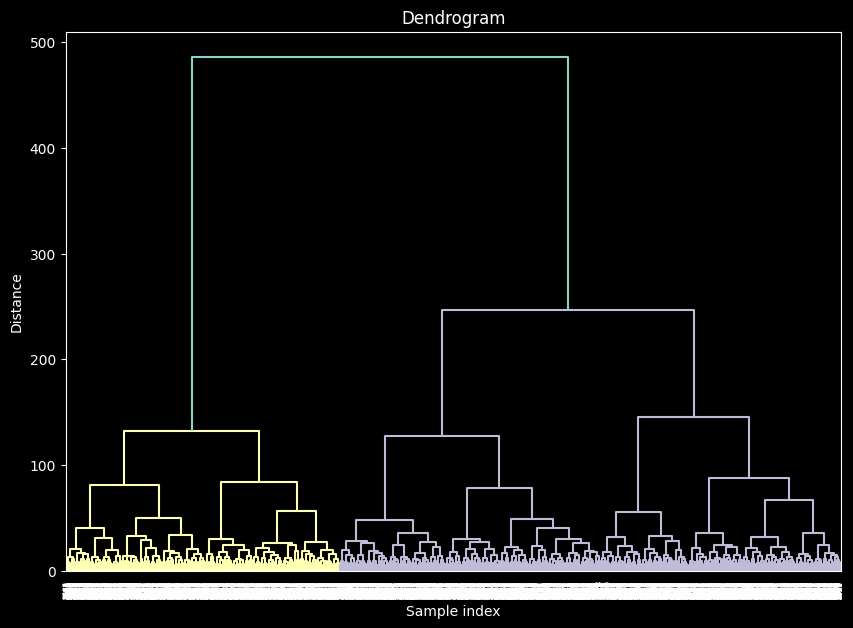

For n_clusters = 2, the average silhouette score is: 0.3710
For n_clusters = 3, the average silhouette score is: 0.2446
For n_clusters = 4, the average silhouette score is: 0.2146
For n_clusters = 5, the average silhouette score is: 0.1827
For n_clusters = 6, the average silhouette score is: 0.1534
For n_clusters = 7, the average silhouette score is: 0.1349
For n_clusters = 8, the average silhouette score is: 0.1180
For n_clusters = 9, the average silhouette score is: 0.1167
For n_clusters = 10, the average silhouette score is: 0.1068


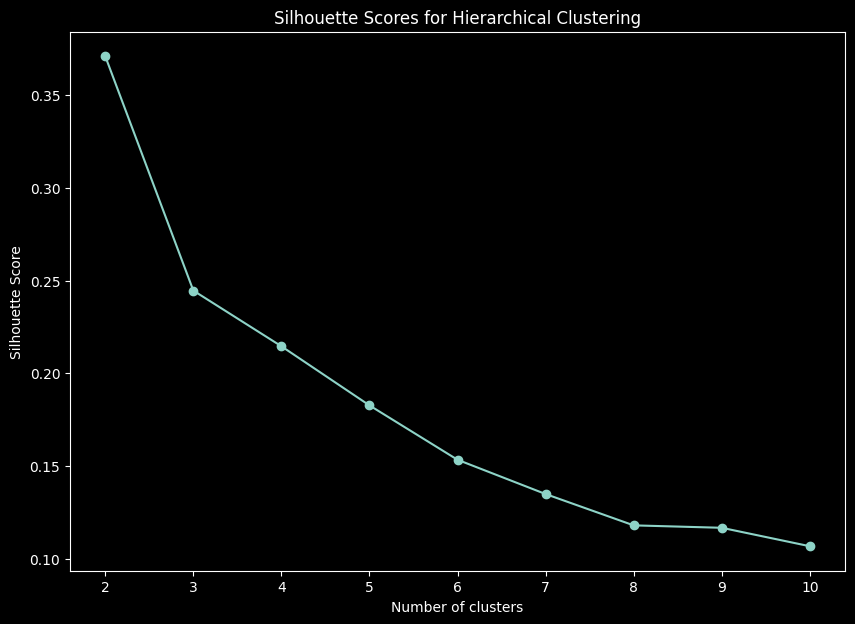

Optimal number of clusters based on silhouette score: 2


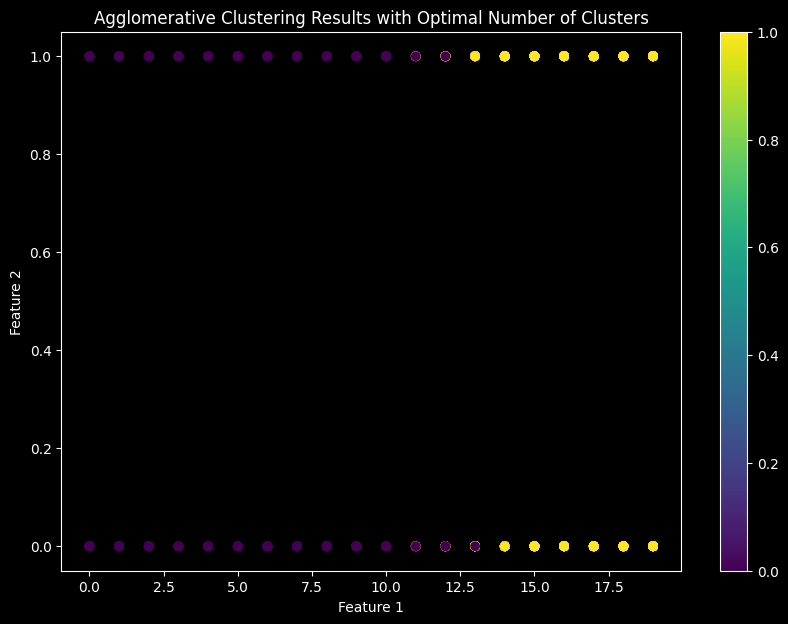

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming customers_merged2 is your DataFrame and has been scaled
X = customers_merged2

# Define a function to plot the dendrogram
def plot_dendrogram(data):
    plt.figure(figsize=(10, 7))
    Z = linkage(data, method='ward')
    dendrogram(Z)
    plt.title('Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrogram to help choose the number of clusters
plot_dendrogram(X)

# Evaluate hierarchical clustering with different numbers of clusters
def evaluate_clusters(X, max_clusters=10):
    silhouette_avg_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        # Apply AgglomerativeClustering
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        clusters = agglomerative.fit_predict(X)
        
        # Calculate silhouette score
        if len(set(clusters)) < 2:
            silhouette_avg = -1  # Silhouette score is not defined for < 2 clusters
        else:
            silhouette_avg = silhouette_score(X, clusters)
        
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.4f}")
    
    return silhouette_avg_scores

# Perform clustering and evaluate
silhouette_scores = evaluate_clusters(X)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 7))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.show()

# Apply AgglomerativeClustering with the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we start from 2 clusters
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

agglomerative_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters)
clusters_optimal = agglomerative_optimal.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_optimal, cmap='viridis', marker='o')
plt.colorbar(scatter)
plt.title('Agglomerative Clustering Results with Optimal Number of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **_5)GaussianMixture_**

In [217]:
customers_merged2.columns

Index(['city_id', 'gender_id', 'transaction_status', 'branch_id',
       'total_transactions', 'coupon_usage_count', 'join_year', 'join_month',
       'join_day', 'transaction_year', 'transaction_month', 'transaction_day'],
      dtype='object')

[I 2024-09-19 11:08:16,495] A new study created in memory with name: no-name-9e0529c2-3e41-48a8-9598-ecb8953cb94f
[I 2024-09-19 11:08:17,023] Trial 0 finished with value: 0.29265358249939066 and parameters: {'covariance_type': 'spherical', 'tol': 0.006768665007756277, 'max_iter': 200}. Best is trial 0 with value: 0.29265358249939066.
[I 2024-09-19 11:08:17,781] Trial 1 finished with value: 0.2858229498289046 and parameters: {'covariance_type': 'tied', 'tol': 0.00030904227844731223, 'max_iter': 300}. Best is trial 0 with value: 0.29265358249939066.
[I 2024-09-19 11:08:18,301] Trial 2 finished with value: 0.2876056941632601 and parameters: {'covariance_type': 'diag', 'tol': 0.0009208621599228349, 'max_iter': 450}. Best is trial 0 with value: 0.29265358249939066.
[I 2024-09-19 11:08:18,893] Trial 3 finished with value: 0.2889344689227506 and parameters: {'covariance_type': 'tied', 'tol': 0.005682260126581839, 'max_iter': 350}. Best is trial 0 with value: 0.29265358249939066.
[I 2024-09-19

Best covariance_type: spherical
Best tol: 0.006768665007756277
Best max_iter: 200
Best silhouette score: 0.2927


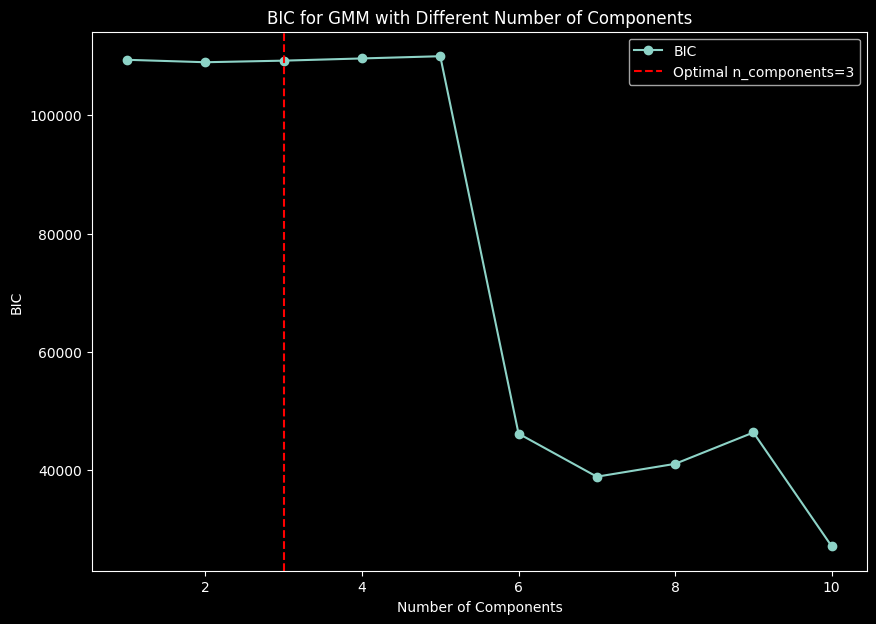

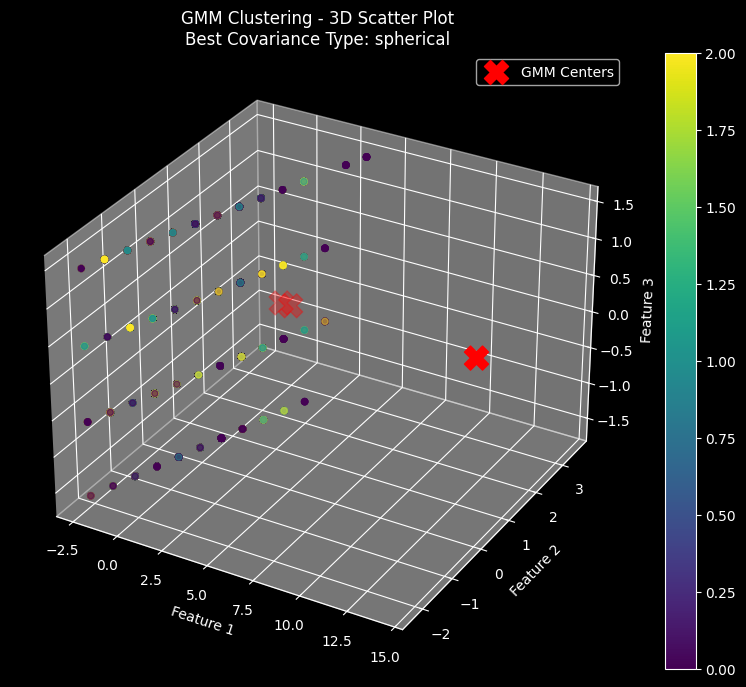

In [225]:
from sklearn.mixture import GaussianMixture
X = customers_merged2


# Objective function for Optuna
def objective(trial):
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    tol = trial.suggest_float('tol', 1e-4, 1e-2, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 500, step=50)

    gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, tol=tol, max_iter=max_iter, random_state=42)
    clusters = gmm.fit_predict(X)

    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(f"Best covariance_type: {study.best_params['covariance_type']}")
print(f"Best tol: {study.best_params['tol']}")
print(f"Best max_iter: {study.best_params['max_iter']}")
print(f"Best silhouette score: {study.best_value:.4f}")

# Apply GMM with the best hyperparameters found
best_covariance_type = study.best_params['covariance_type']
best_tol = study.best_params['tol']
best_max_iter = study.best_params['max_iter']

gmm_optimal = GaussianMixture(n_components=3, covariance_type=best_covariance_type, tol=best_tol, max_iter=best_max_iter, random_state=42)
clusters_optimal = gmm_optimal.fit_predict(X)

# Plot BIC for different numbers of components
X_array = X.values  # Convert DataFrame to numpy array

bic = []
n_components_range = range(1, 11)
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_array)
    bic.append(gmm.bic(X_array))

plt.figure(figsize=(10, 7))
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.axvline(x=3, color='r', linestyle='--', label=f'Optimal n_components={3}')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM with Different Number of Components')
plt.legend()
plt.show()

# 3D scatter plot for GMM clustering results
if X.shape[1] >= 3:  # Ensure there are at least 3 features
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Unpack X into individual coordinates for plotting
    x = X.iloc[:, 4]
    y = X.iloc[:, 5]
    z = X.iloc[:, 6]

    # Plotting data points with clusters
    scatter = ax.scatter(x, y, z, c=clusters_optimal, cmap='viridis')

    # Plotting cluster centers as red 'X'
    gmm_centers = gmm_optimal.means_
    ax.scatter(gmm_centers[:, 0], gmm_centers[:, 1], gmm_centers[:, 2],
               s=300, c='red', marker='X', label='GMM Centers')

    # Labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'GMM Clustering - 3D Scatter Plot\nBest Covariance Type: {best_covariance_type}')
    ax.legend()

    # Colorbar
    plt.colorbar(scatter)
    plt.show()
else:
    print("Error: X does not have at least 3 features for 3D plotting.")

# **_Evalution of the first Phase_** 

In [224]:
customers_merged2.columns

Index(['city_id', 'gender_id', 'transaction_status', 'branch_id',
       'total_transactions', 'coupon_usage_count', 'join_year', 'join_month',
       'join_day', 'transaction_year', 'transaction_month', 'transaction_day'],
      dtype='object')

**_Note: I know that making n clusters shows higher silhout scores, but according to k methods and logical business, I made hyperpratmeter tuning for n clusters = 3._** 

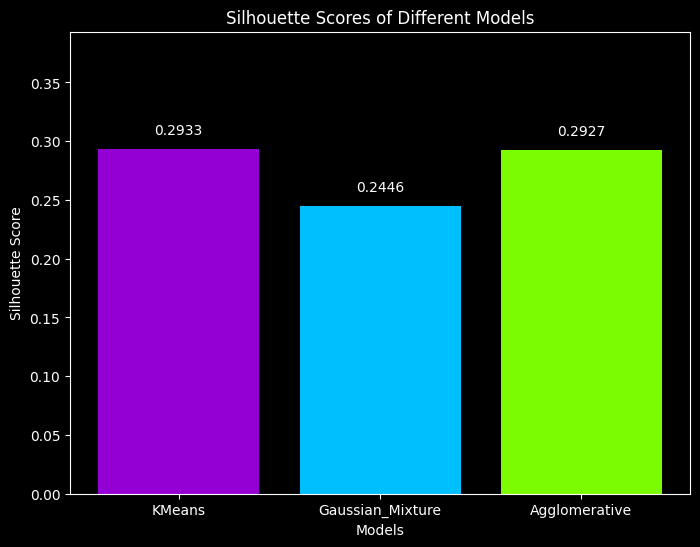

In [230]:
models = ['KMeans', 'Gaussian_Mixture', 'Agglomerative']
silhouette_scores = [0.2933, 0.2446, 0.2927]

# Round the silhouette scores to the nearest 0.1
rounded_scores = [round(score, 4) for score in silhouette_scores]

# List of colors for each bar
colors = ['#9400d3', '#00bfff', '#7cfc00']

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, silhouette_scores, color=colors)

# Add annotations
for bar, score in zip(bars, rounded_scores):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{score}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores of Different Models')
plt.ylim(0, max(silhouette_scores) + 0.1)  # Adjust y-axis limit to make space for annotations

# Show plot
plt.show()
plt.show()

# **_PCA_**

Number of Components: 1, Cumulative Explained Variance Ratio: 0.6705, Approx. AIC: 26875.1686
Number of Components: 2, Cumulative Explained Variance Ratio: 0.8342, Approx. AIC: 24503.2095
Number of Components: 3, Cumulative Explained Variance Ratio: 0.8746, Approx. AIC: 22714.2402
Number of Components: 4, Cumulative Explained Variance Ratio: 0.9119, Approx. AIC: 21487.0909
Number of Components: 5, Cumulative Explained Variance Ratio: 0.9341, Approx. AIC: 20493.1940
Number of Components: 6, Cumulative Explained Variance Ratio: 0.9538, Approx. AIC: 19688.2491
Number of Components: 7, Cumulative Explained Variance Ratio: 0.9726, Approx. AIC: 19017.2613
Number of Components: 8, Cumulative Explained Variance Ratio: 0.9859, Approx. AIC: 18419.0900
Number of Components: 9, Cumulative Explained Variance Ratio: 0.9907, Approx. AIC: 17856.8859
Number of Components: 10, Cumulative Explained Variance Ratio: 0.9956, Approx. AIC: 17356.3558
Number of Components: 11, Cumulative Explained Variance Rat

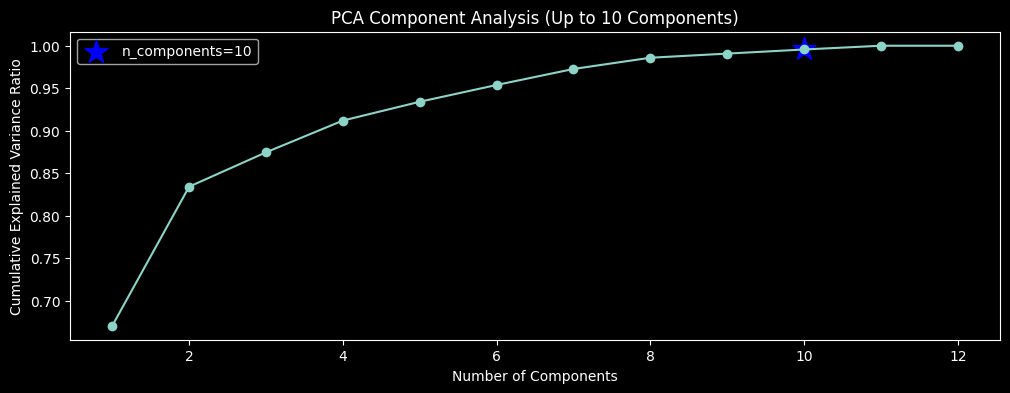

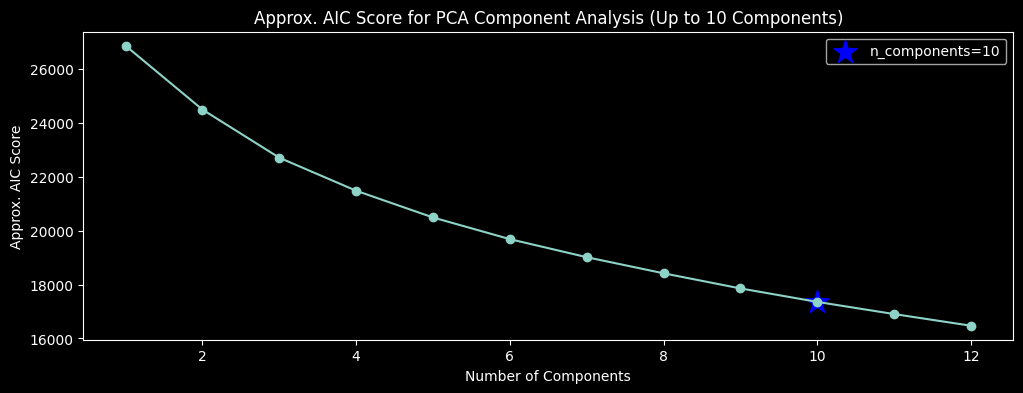

In [189]:
from sklearn.decomposition import PCA

X = customers_merged2.copy()

# Set the number of components to analyze, up to 10 components
n_components = np.arange(1, 13)
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)

    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

  
    k = n 
 
    log_likelihood = -0.5 * X.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")


plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(10, explained_variance_ratios[9], c='b', marker='*', label="n_components=10", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis (Up to 10 Components)')
plt.legend()
# plt.grid(True)
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(10, aic_scores[9], c='b', marker='*', label="n_components=10", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis (Up to 10 Components)')
plt.legend()
# plt.grid(True)
plt.show()


In [190]:
customers_merged2.columns

Index(['city_id', 'gender_id', 'transaction_status', 'branch_id',
       'total_transactions', 'coupon_usage_count', 'join_year', 'join_month',
       'join_day', 'transaction_year', 'transaction_month', 'transaction_day'],
      dtype='object')

**_Effect of choosing 10 componenets_**

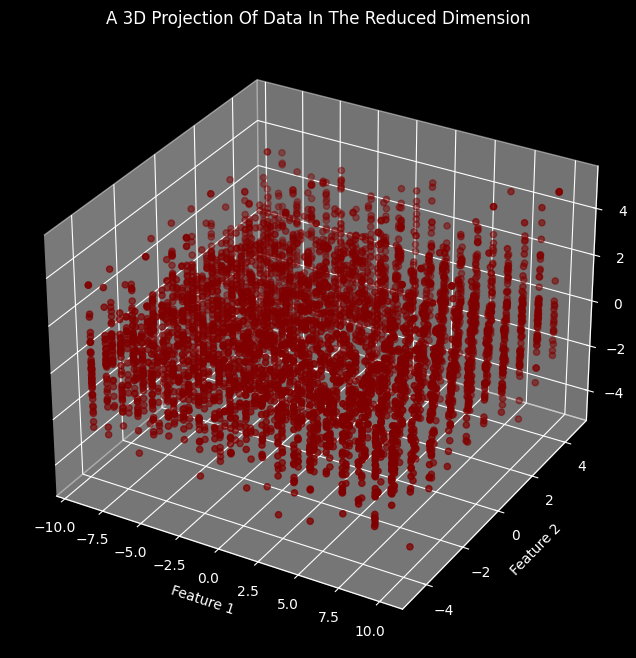

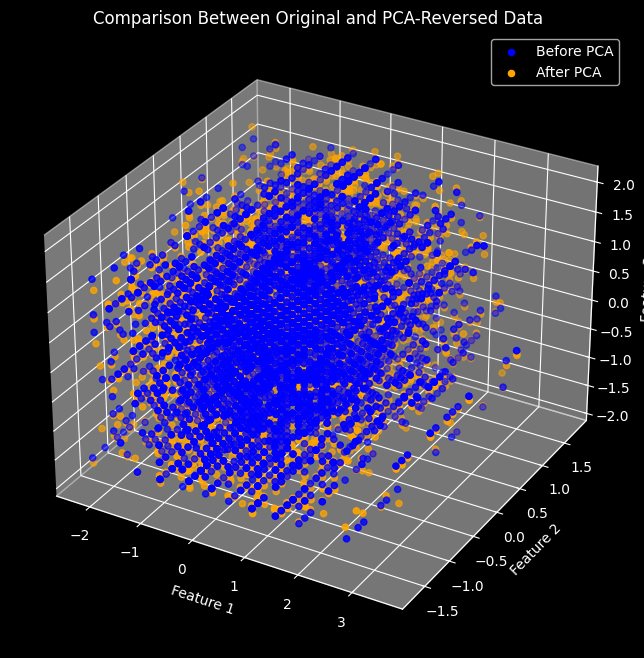

In [191]:
pca = PCA(n_components=10,copy=True)
X=customers_merged2
X_transformed = pca.fit_transform(X)
afterreverse = pca.inverse_transform(X_transformed)

# Create DataFrames for PCA components and reversed data
PCA_ds = pd.DataFrame(X_transformed, columns=[f"f{i+1}" for i in range(10)])
afterreverse_df = pd.DataFrame(afterreverse, columns=X.columns)

# Select three components for 3D visualization
# Ensure you have at least 3 components in PCA
x = PCA_ds["f1"]
y = PCA_ds["f2"]
z = PCA_ds["f3"]

# Plot 3D projection of PCA-transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# Select features from the original DataFrame
x1 =customers_merged2["coupon_usage_count"]
y1 = customers_merged2["transaction_day"]
z1 = customers_merged2["join_month"]

# Select the same features from the reversed data
# Ensure these columns exist in afterreverse_df
x2 = afterreverse_df["coupon_usage_count"]
y2 = afterreverse_df["transaction_day"]
z2 = afterreverse_df["join_month"]

# Plot comparison between original and PCA-reversed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, y1, z1, c="blue", marker="o", label="Before PCA")
ax.scatter(x2, y2, z2, c="orange", marker="o", label="After PCA")
ax.set_title("Comparison Between Original and PCA-Reversed Data")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


# **_1)Kmeans && PCA_**

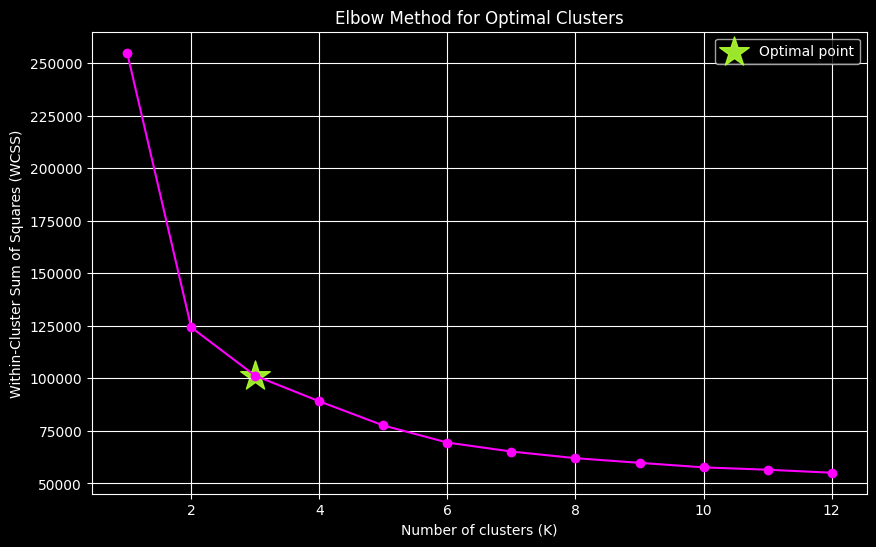

In [141]:
X_scaled = customers_merged2
pca = PCA(n_components=10)  # Adjust n_components if needed
X_transformed = pca.fit_transform(X_scaled)


wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), wcss, marker='o', color='#ff00ff')
plt.scatter(3, wcss[2], marker='*', s=500, alpha=0.9, c='#adff2f', label='Optimal point')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.grid(True)
plt.show()

Without Hyperparameter Tuning

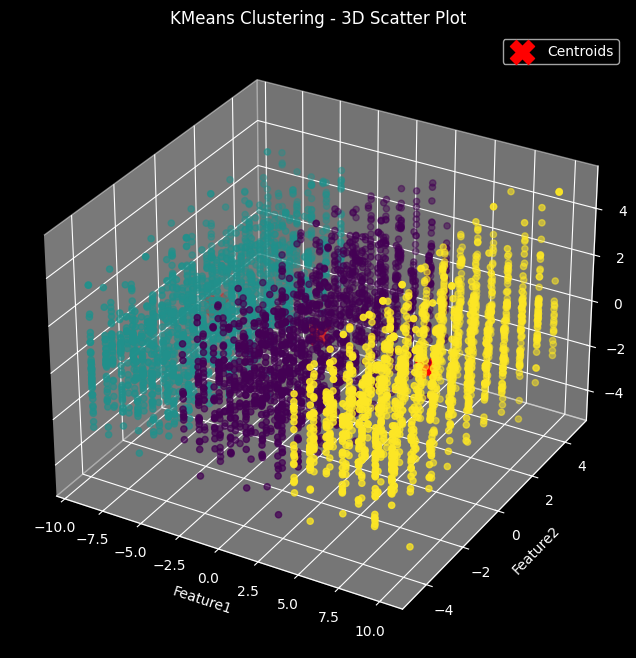

In [142]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_transformed)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

In [143]:
silhouette_avg = silhouette_score(X_transformed, labels)
silhouette_avg

0.2706934559092967

In [145]:
X_transformed.shape

(5000, 10)

**_Hyperparameter Tuning using Optuna_**

[I 2024-09-19 10:10:24,714] A new study created in memory with name: no-name-adba38ec-6248-4b42-bf2e-a769f08abb82
[I 2024-09-19 10:10:25,224] Trial 0 finished with value: 0.29265349528951384 and parameters: {'init': 'k-means++', 'max_iter': 150}. Best is trial 0 with value: 0.29265349528951384.
[I 2024-09-19 10:10:25,651] Trial 1 finished with value: 0.2706934559092967 and parameters: {'init': 'random', 'max_iter': 350}. Best is trial 0 with value: 0.29265349528951384.
[I 2024-09-19 10:10:26,166] Trial 2 finished with value: 0.29265349528951384 and parameters: {'init': 'k-means++', 'max_iter': 250}. Best is trial 0 with value: 0.29265349528951384.
[I 2024-09-19 10:10:26,931] Trial 3 finished with value: 0.2706934559092967 and parameters: {'init': 'random', 'max_iter': 250}. Best is trial 0 with value: 0.29265349528951384.
[I 2024-09-19 10:10:27,800] Trial 4 finished with value: 0.29265349528951384 and parameters: {'init': 'k-means++', 'max_iter': 250}. Best is trial 0 with value: 0.292

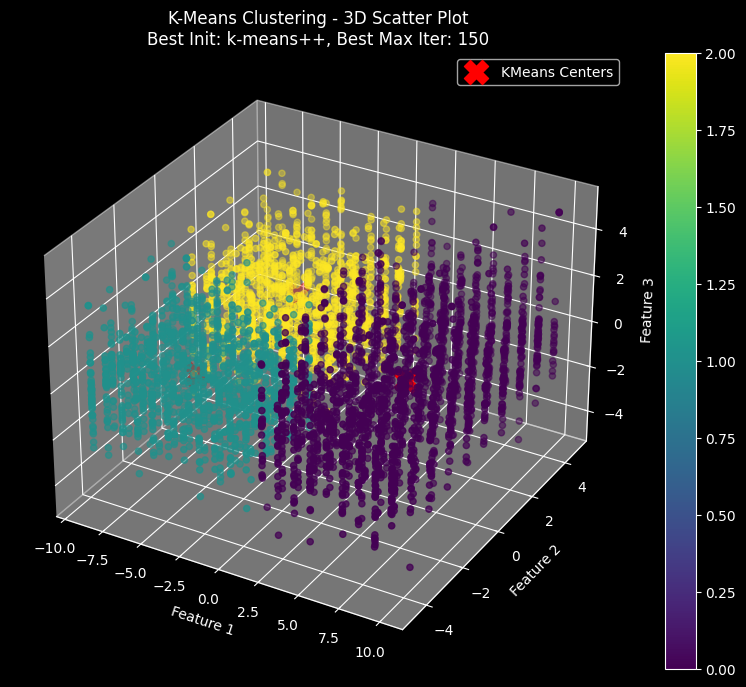

In [205]:
X = X_transformed

# Objective function for Optuna
def objective(trial):
    init_method = trial.suggest_categorical('init', ['k-means++', 'random'])
    max_iter = trial.suggest_int('max_iter', 100, 500, step=50)

    kmeans = KMeans(n_clusters=3, init=init_method, max_iter=max_iter, n_init='auto', random_state=42)
    clusters = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get best parameters
best_init = study.best_params['init']
best_max_iter = study.best_params['max_iter']

# Apply K-Means with the best hyperparameters found
kmeans_optimal = KMeans(n_clusters=3, init=best_init, max_iter=best_max_iter, n_init='auto', random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X)
kmeans_centers = kmeans_optimal.cluster_centers_

# 3D scatter plot for K-Means clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Unpack X into individual coordinates for plotting
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plotting data points with clusters
scatter = ax.scatter(x, y, z, c=clusters_optimal, cmap='viridis')

# Plotting cluster centers as red 'X'
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], kmeans_centers[:, 2],
           s=300, c='red', marker='X', label='KMeans Centers')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'K-Means Clustering - 3D Scatter Plot\nBest Init: {best_init}, Best Max Iter: {best_max_iter}')
ax.legend()

# Colorbar
plt.colorbar(scatter)
plt.show()

# # Plot clusters with optimal hyperparameters
# plt.figure(figsize=(10, 7))
# scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters_optimal, cmap='viridis', marker='o')
# plt.colorbar(scatter)
# plt.title(f'K-Means Clustering Results with Fixed k=3\nBest Init: {best_init}, Best Max Iter: {best_max_iter}')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# **_2)DBSCAN && PCA_**

In [193]:
X = X_transformed
# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    eps = trial.suggest_float('eps', 0.1, 1.0, step=0.1)
    min_samples = trial.suggest_int('min_samples', 2, 10)
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    if len(set(clusters)) < 2:
        return -1  # Silhouette score is not defined for < 2 clusters
    
    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Create Optuna study
study = optuna.create_study(direction='maximize')

# Optimize
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

# Apply DBSCAN with the best parameters
optimal_eps = best_params['eps']
optimal_min_samples = best_params['min_samples']
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
clusters_optimal = dbscan_optimal.fit_predict(X)

# Print number of clusters and noise points
unique_labels = np.unique(clusters_optimal)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
num_noise_points = list(clusters_optimal).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

[I 2024-09-19 09:05:54,468] A new study created in memory with name: no-name-b4163f2e-9732-45cb-af4a-d269e0982a2d
[I 2024-09-19 09:05:54,958] Trial 0 finished with value: -0.5986505065087028 and parameters: {'eps': 0.7000000000000001, 'min_samples': 2}. Best is trial 0 with value: -0.5986505065087028.
[I 2024-09-19 09:05:55,017] Trial 1 finished with value: -1.0 and parameters: {'eps': 0.1, 'min_samples': 4}. Best is trial 0 with value: -0.5986505065087028.
[I 2024-09-19 09:05:55,495] Trial 2 finished with value: -0.18048949235224235 and parameters: {'eps': 0.7000000000000001, 'min_samples': 3}. Best is trial 2 with value: -0.18048949235224235.
[I 2024-09-19 09:05:55,554] Trial 3 finished with value: -1.0 and parameters: {'eps': 0.1, 'min_samples': 9}. Best is trial 2 with value: -0.18048949235224235.
[I 2024-09-19 09:05:55,618] Trial 4 finished with value: -1.0 and parameters: {'eps': 0.30000000000000004, 'min_samples': 10}. Best is trial 2 with value: -0.18048949235224235.
[I 2024-09

Best parameters: {'eps': 0.7000000000000001, 'min_samples': 3}
Best silhouette score: -0.18048949235224235
Number of clusters: 2
Number of noise points: 4994


# **_3)MeanShift_**

In [194]:
X = X_transformed

def objective(trial):
    # Hyperparameter search space
    bandwidth = trial.suggest_float('bandwidth', 0.1, 1.0, step=0.1)

    # Apply MeanShift
    mean_shift = MeanShift(bandwidth=bandwidth)
    clusters = mean_shift.fit_predict(X)


    if len(set(clusters)) < 2:
        return -1  # Silhouette score is not defined for < 2 clusters
    
    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg


study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=100)

# Get best parameters
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

# Apply MeanShift with the best parameters
optimal_bandwidth = best_params['bandwidth']
mean_shift_optimal = MeanShift(bandwidth=optimal_bandwidth)
clusters_optimal = mean_shift_optimal.fit_predict(X)

# Print number of clusters
unique_labels = np.unique(clusters_optimal)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise if any

print(f"Number of clusters: {num_clusters}")

[I 2024-09-19 09:07:09,082] A new study created in memory with name: no-name-7dd4f6b4-99a8-490f-94de-8c6f65d417e9
[I 2024-09-19 09:07:14,939] Trial 0 finished with value: 0.006342538291864036 and parameters: {'bandwidth': 0.30000000000000004}. Best is trial 0 with value: 0.006342538291864036.
[I 2024-09-19 09:07:20,776] Trial 1 finished with value: 0.0037695718842700216 and parameters: {'bandwidth': 0.2}. Best is trial 0 with value: 0.006342538291864036.
[I 2024-09-19 09:07:26,694] Trial 2 finished with value: 0.0037695718842700216 and parameters: {'bandwidth': 0.2}. Best is trial 0 with value: 0.006342538291864036.
[I 2024-09-19 09:07:32,610] Trial 3 finished with value: 0.02456220695970241 and parameters: {'bandwidth': 0.8}. Best is trial 3 with value: 0.02456220695970241.
[I 2024-09-19 09:07:38,464] Trial 4 finished with value: 0.009322630348666797 and parameters: {'bandwidth': 0.4}. Best is trial 3 with value: 0.02456220695970241.
[I 2024-09-19 09:07:44,255] Trial 5 finished with v

Best parameters: {'bandwidth': 1.0}
Best silhouette score: 0.03292640295460878
Number of clusters: 4843


# **_4)AgglomerativeClustering_**

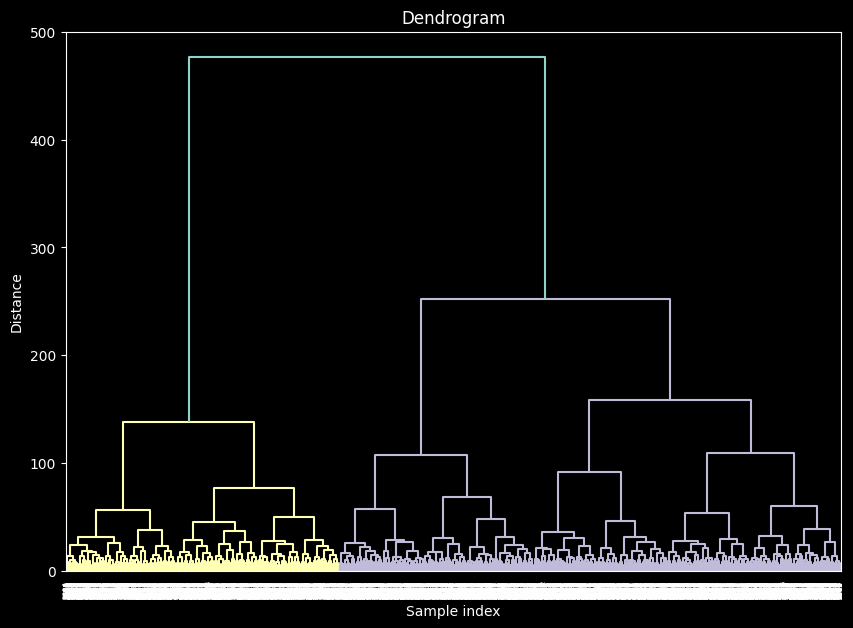

For n_clusters = 2, the average silhouette score is: 0.3557
For n_clusters = 3, the average silhouette score is: 0.2396
For n_clusters = 4, the average silhouette score is: 0.2244
For n_clusters = 5, the average silhouette score is: 0.1801
For n_clusters = 6, the average silhouette score is: 0.1480
For n_clusters = 7, the average silhouette score is: 0.1370
For n_clusters = 8, the average silhouette score is: 0.1265
For n_clusters = 9, the average silhouette score is: 0.1084
For n_clusters = 10, the average silhouette score is: 0.1031


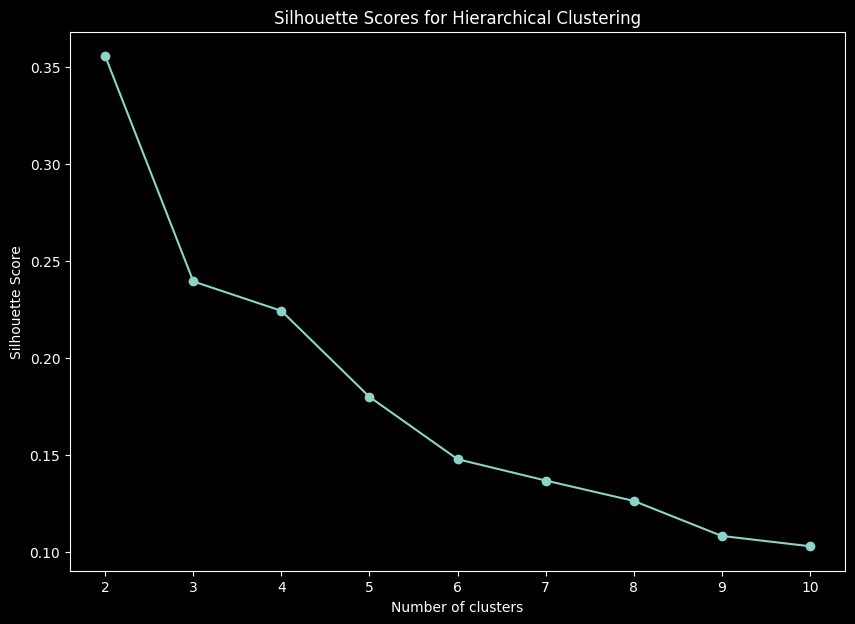

Optimal number of clusters based on silhouette score: 2


In [195]:
X =  X_transformed

def plot_dendrogram(data):
    plt.figure(figsize=(10, 7))
    Z = linkage(data, method='ward')
    dendrogram(Z)
    plt.title('Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(X)

def evaluate_clusters(X, max_clusters=10):
    silhouette_avg_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        # Apply AgglomerativeClustering
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        clusters = agglomerative.fit_predict(X)
        
        # Calculate silhouette score
        if len(set(clusters)) < 2:
            silhouette_avg = -1  # Silhouette score is not defined for < 2 clusters
        else:
            silhouette_avg = silhouette_score(X, clusters)
        
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.4f}")
    
    return silhouette_avg_scores

# Perform clustering and evaluate
silhouette_scores = evaluate_clusters(X)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 7))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.show()

# Apply AgglomerativeClustering with the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we start from 2 clusters
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

agglomerative_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters)
clusters_optimal = agglomerative_optimal.fit_predict(X)


# **_5)GaussianMixture_**

[I 2024-09-19 09:52:17,647] A new study created in memory with name: no-name-f2afc57d-4571-4a69-985b-d41feb4e4fe1
[I 2024-09-19 09:52:18,237] Trial 0 finished with value: 0.29245980085342915 and parameters: {'covariance_type': 'spherical', 'tol': 0.00018043975150032956, 'max_iter': 250}. Best is trial 0 with value: 0.29245980085342915.
[I 2024-09-19 09:52:18,873] Trial 1 finished with value: 0.2883705980975285 and parameters: {'covariance_type': 'full', 'tol': 0.0029716380207096185, 'max_iter': 300}. Best is trial 0 with value: 0.29245980085342915.
[I 2024-09-19 09:52:19,408] Trial 2 finished with value: 0.29357072469185347 and parameters: {'covariance_type': 'spherical', 'tol': 0.002406669854130549, 'max_iter': 450}. Best is trial 2 with value: 0.29357072469185347.
[I 2024-09-19 09:52:19,947] Trial 3 finished with value: 0.29287489425953034 and parameters: {'covariance_type': 'spherical', 'tol': 0.0015406119734245746, 'max_iter': 150}. Best is trial 2 with value: 0.29357072469185347.


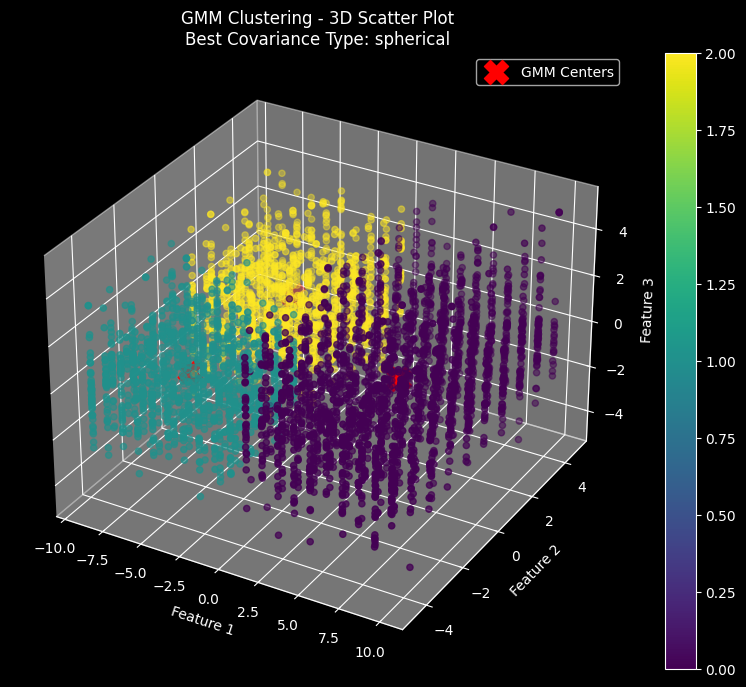

In [204]:
from mpl_toolkits.mplot3d import Axes3D
X = X_transformed

# Objective function for Optuna
def objective(trial):
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    tol = trial.suggest_float('tol', 1e-4, 1e-2, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 500, step=50)

    gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, tol=tol, max_iter=max_iter, random_state=42)
    clusters = gmm.fit_predict(X)

    silhouette_avg = silhouette_score(X, clusters)
    return silhouette_avg

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get best parameters
best_covariance_type = study.best_params['covariance_type']
best_tol = study.best_params['tol']
best_max_iter = study.best_params['max_iter']

# Fit GMM model with best parameters
gmm_optimal = GaussianMixture(n_components=3, covariance_type=best_covariance_type, tol=best_tol, max_iter=best_max_iter, random_state=42)
clusters_optimal = gmm_optimal.fit_predict(X)
gmm_centers = gmm_optimal.means_

# 3D scatter plot for GMM clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Unpack X into individual coordinates for plotting
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plotting data points with clusters
scatter = ax.scatter(x, y, z, c=clusters_optimal, cmap='viridis')

# Plotting cluster centers (means) as red 'X'
ax.scatter(gmm_centers[:, 0], gmm_centers[:, 1], gmm_centers[:, 2],
           s=300, c='red', marker='X', label='GMM Centers')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'GMM Clustering - 3D Scatter Plot\nBest Covariance Type: {best_covariance_type}')
ax.legend()

# Colorbar
plt.colorbar(scatter)
plt.show()


# **_Final Evaltion with PCA_**

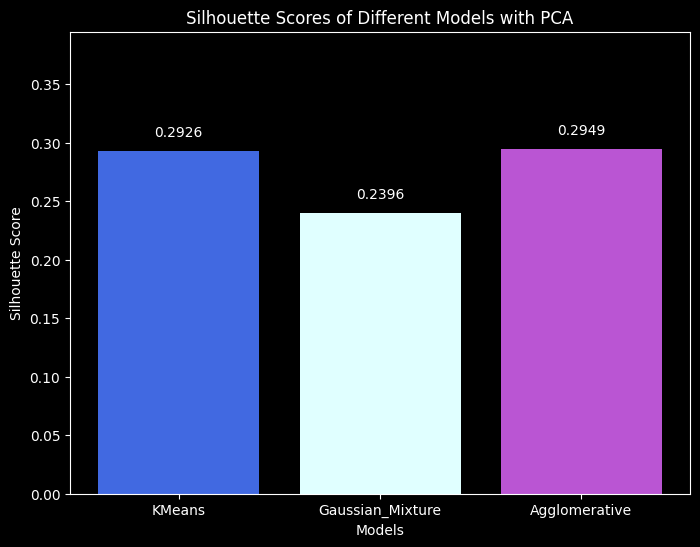

In [232]:
models = ['KMeans', 'Gaussian_Mixture', 'Agglomerative']
silhouette_scores = [0.2926,0.2396,0.29488]

# Round the silhouette scores to the nearest 0.1
rounded_scores = [round(score, 4) for score in silhouette_scores]

# List of colors for each bar
colors = ['#4169e1', '#e0ffff', '#ba55d3']

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, silhouette_scores, color=colors)

# Add annotations
for bar, score in zip(bars, rounded_scores):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{score}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores of Different Models with PCA')
plt.ylim(0, max(silhouette_scores) + 0.1)  # Adjust y-axis limit to make space for annotations

# Show plot
plt.show()
plt.show()

**_Note the best model was Agglomerative using pca_** 

In [238]:
best_covariance_type = 'spherical'
best_tol = 0.00956893026513957
best_max_iter = 350
n_components = 3  # Assuming you want 3 clusters as before

# Convert DataFrame to numpy array if necessary
X = X_transformed

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type=best_covariance_type, tol=best_tol, max_iter=best_max_iter, random_state=42)

# Fit the model and predict clusters
clusters = gmm.fit_predict(X)



In [239]:
clusters.shape

(5000,)

In [240]:
Final_Data= customers_merged2.copy()

# Define the optimal parameters
n_clusters = 3  # Optimal number of clusters from previous results


# Add the cluster labels to the original DataFrame
Final_Data['Cluster'] = clusters

In [241]:
Final_Data.shape

(5000, 13)

# **_Supervised Checks_**

In [242]:
!pip install xgboost


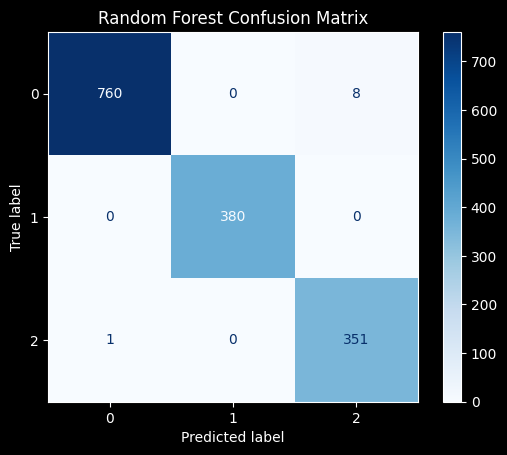

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       768
           1       1.00      1.00      1.00       380
           2       0.98      1.00      0.99       352

    accuracy                           0.99      1500
   macro avg       0.99      1.00      0.99      1500
weighted avg       0.99      0.99      0.99      1500



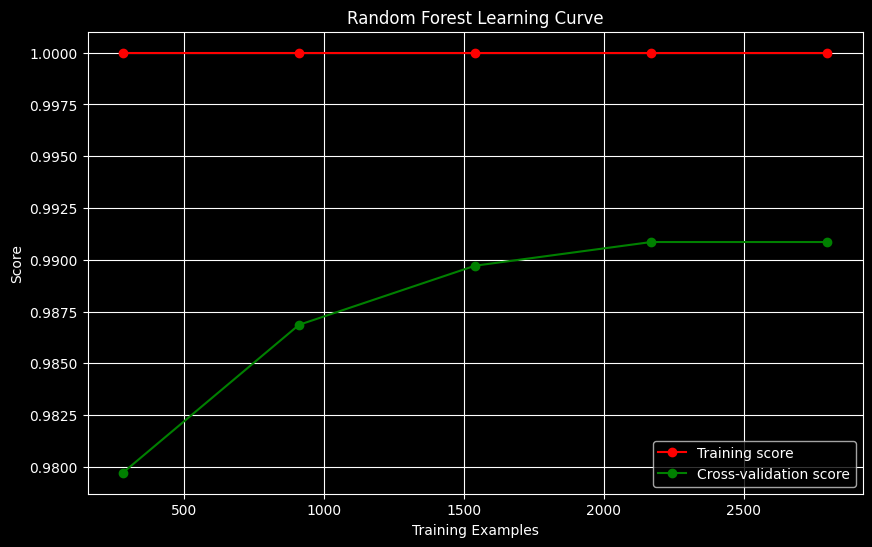

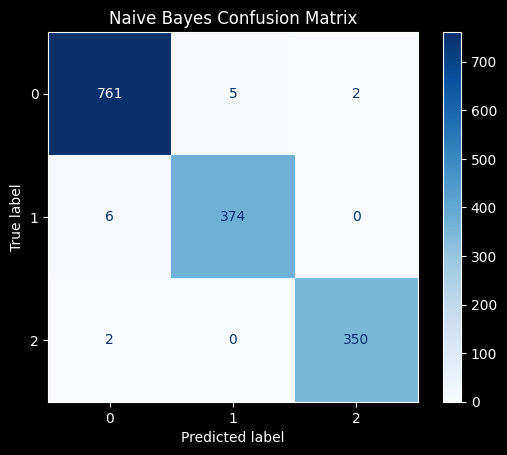

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       768
           1       0.99      0.98      0.99       380
           2       0.99      0.99      0.99       352

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



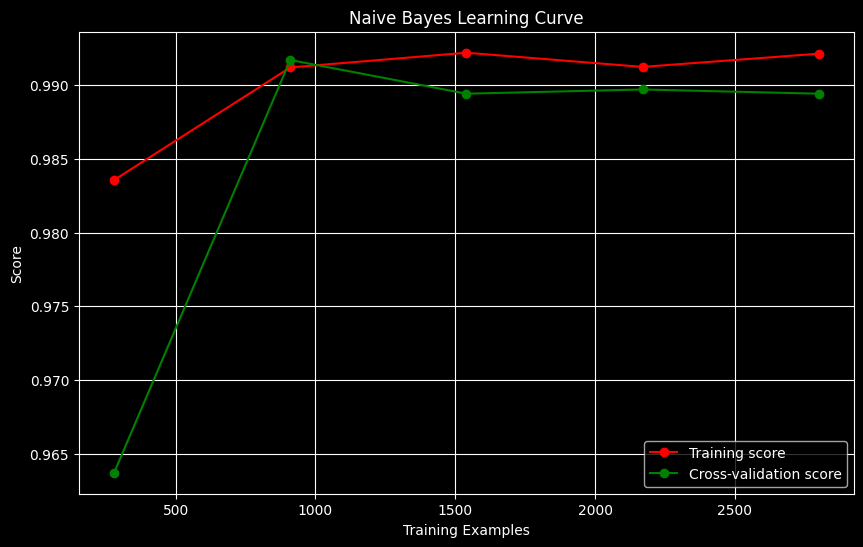

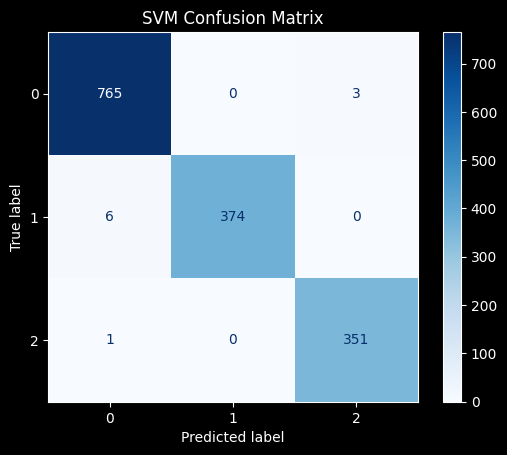

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       768
           1       1.00      0.98      0.99       380
           2       0.99      1.00      0.99       352

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



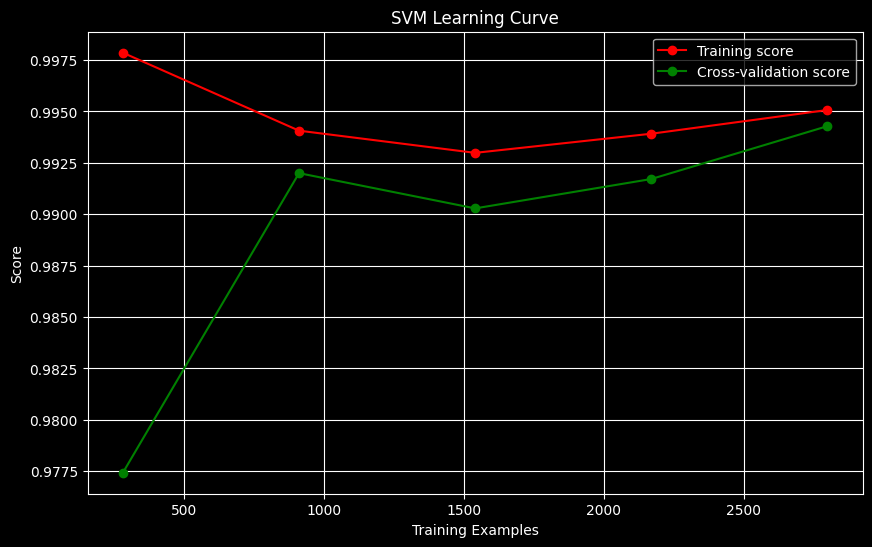

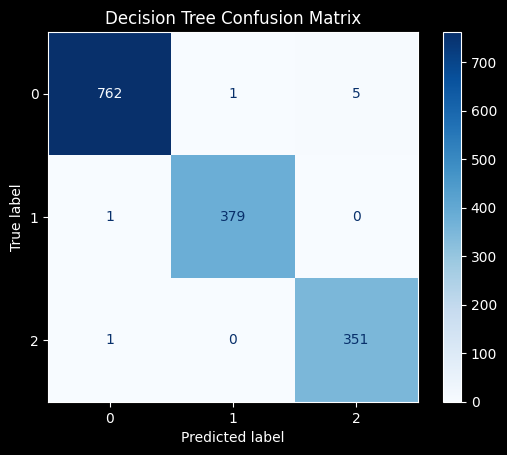

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       768
           1       1.00      1.00      1.00       380
           2       0.99      1.00      0.99       352

    accuracy                           0.99      1500
   macro avg       0.99      1.00      0.99      1500
weighted avg       0.99      0.99      0.99      1500



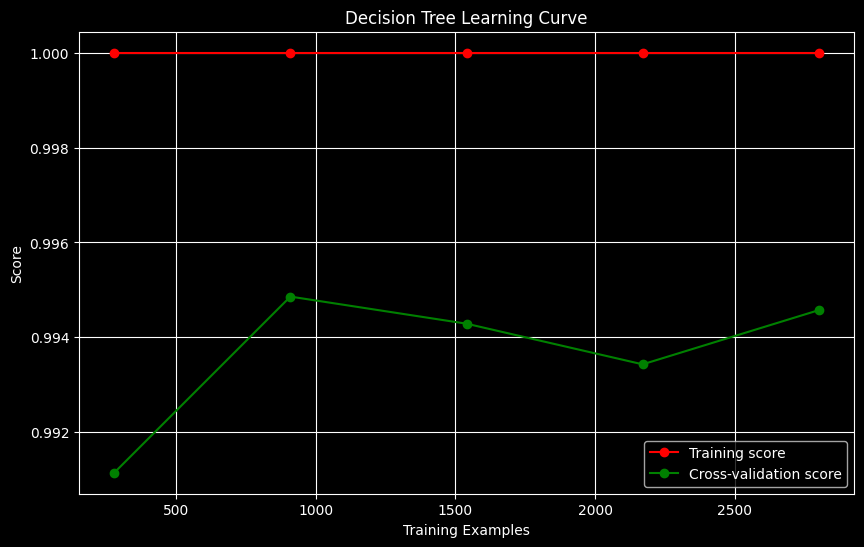

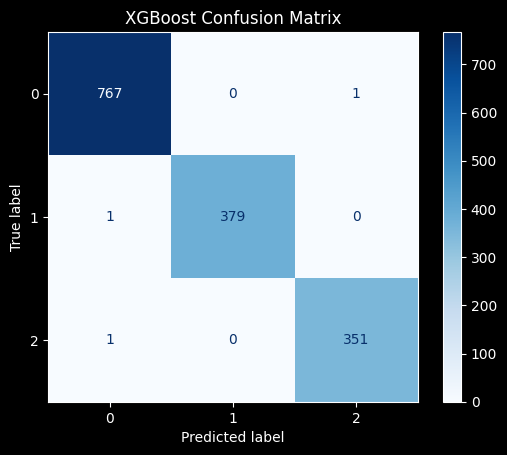

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       1.00      1.00      1.00       380
           2       1.00      1.00      1.00       352

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



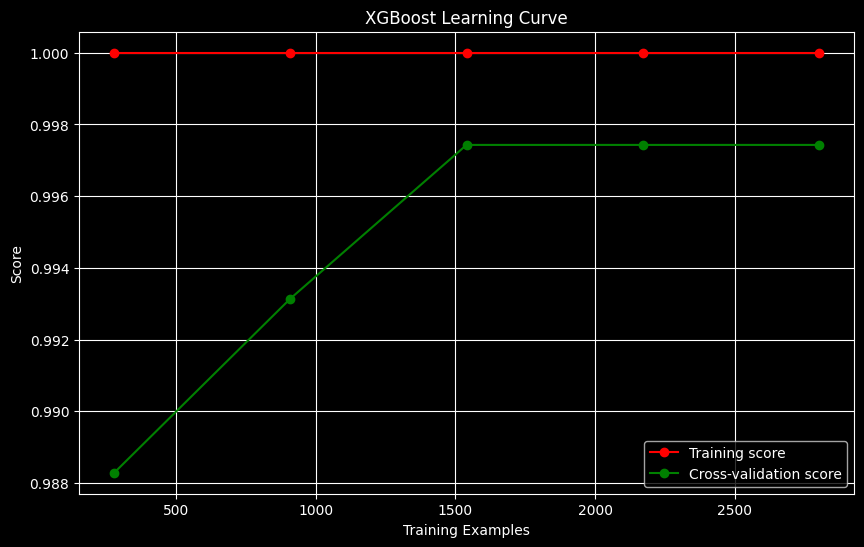

In [243]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb

# Assume Final_Data is your DataFrame and the target column is 'target'
X = Final_Data.drop(columns=['Cluster'])
y = Final_Data['Cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Prepare for plotting learning curves
def plot_learning_curve(model, title, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(f'{name} Classification Report:\n')
    print(classification_report(y_test, y_pred))
    
    # Learning Curve
    plt.figure(figsize=(10, 6))
    plot_learning_curve(model, f'{name} Learning Curve', X_train, y_train)
    plt.show()

[I 2024-09-19 12:58:46,053] A new study created in memory with name: no-name-f6cf1b0b-5c30-4848-8b66-dfb30d8495f9
[I 2024-09-19 12:58:46,101] Trial 0 finished with value: 0.9933333333333333 and parameters: {'C': 544.5554254425977, 'kernel': 'linear'}. Best is trial 0 with value: 0.9933333333333333.
/tmp/ipykernel_36/2835670166.py:47: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1) if kernel != 'linear' else 'scale'
[I 2024-09-19 12:58:46,573] Trial 1 finished with value: 0.6473333333333333 and parameters: {'C': 858.6767376975222, 'kernel': 'sigmoid', 'gamma': 0.0068582403026406875}. Best is trial 0 with value: 0.9933333333333333.
[I 2024-09-19 12:58:46,621] Trial 2 finished with value: 0.9933333333333333 and parameters: {'C': 646.1530903718711, 'kernel': 'linear'}. Best is tria

Best parameters: {'C': 409.6069084855712, 'kernel': 'poly', 'gamma': 0.0006510134375941604, 'degree': 1}


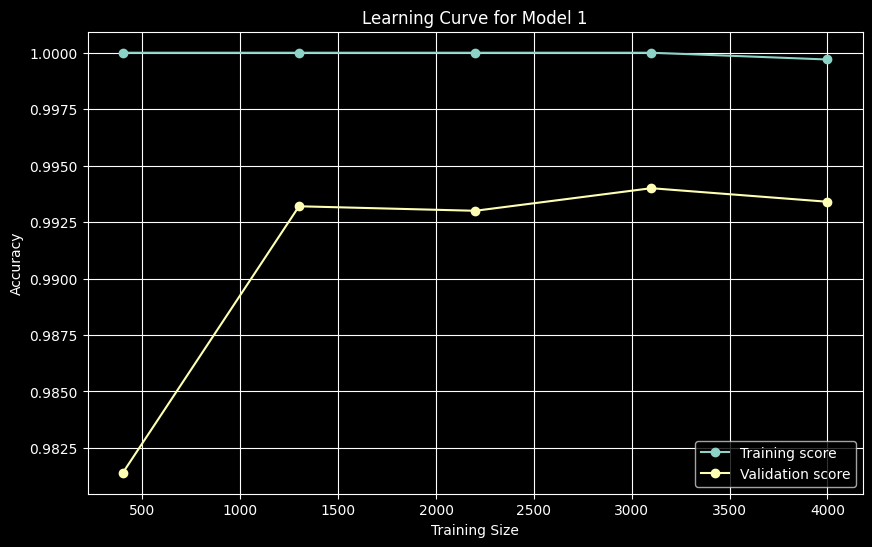

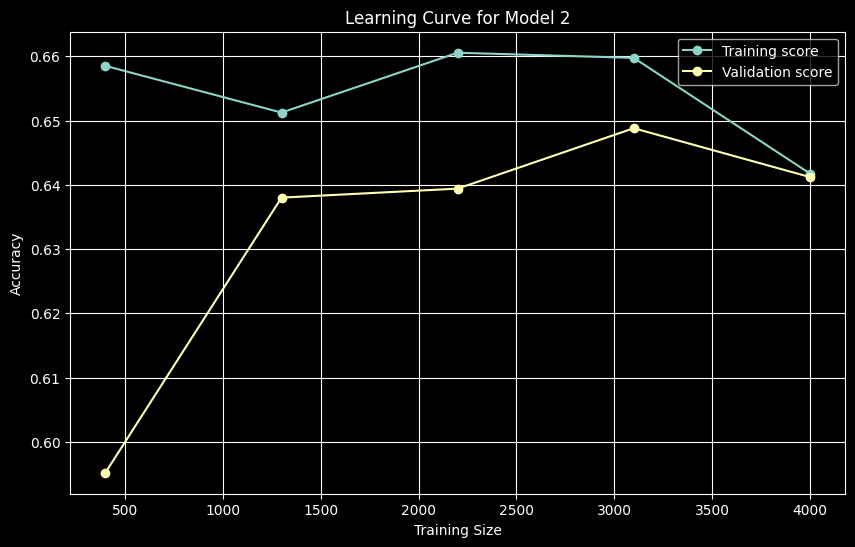

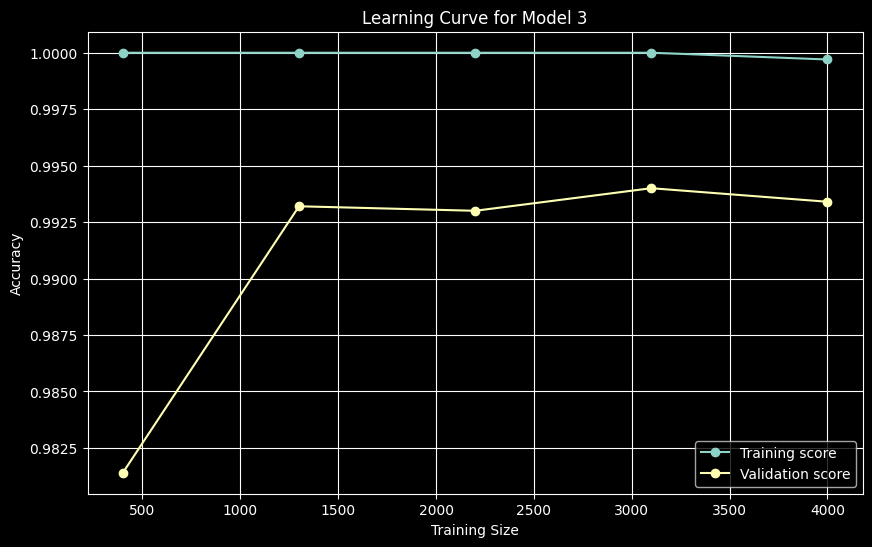

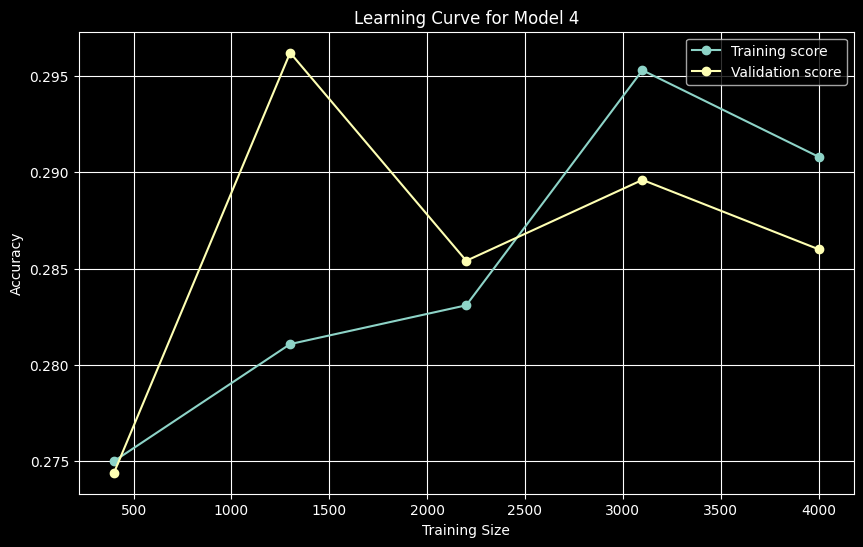

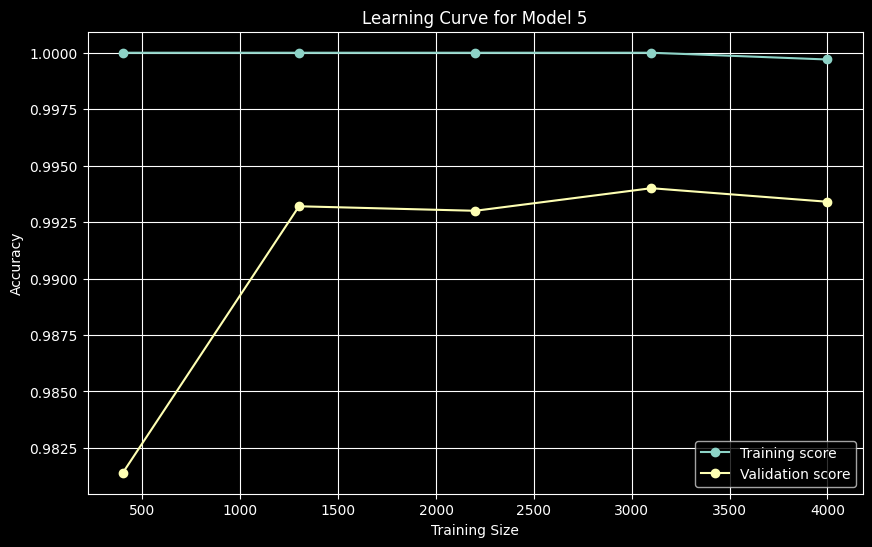

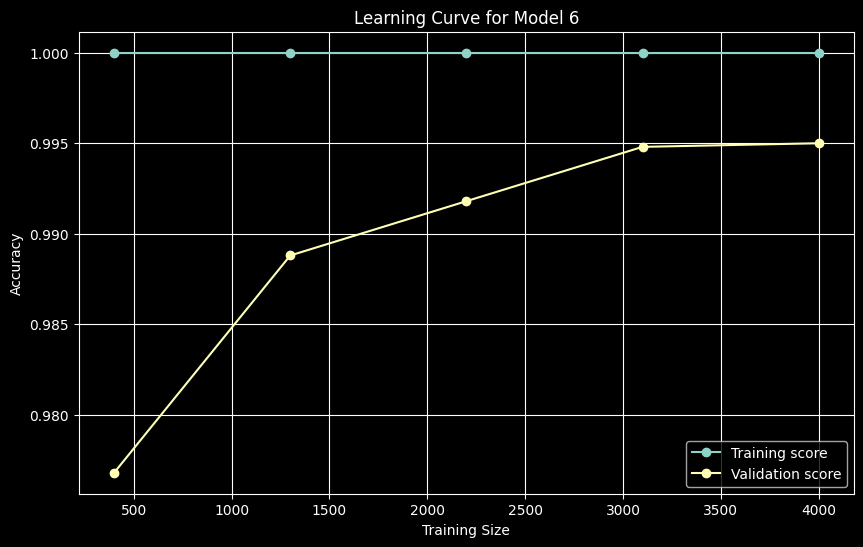

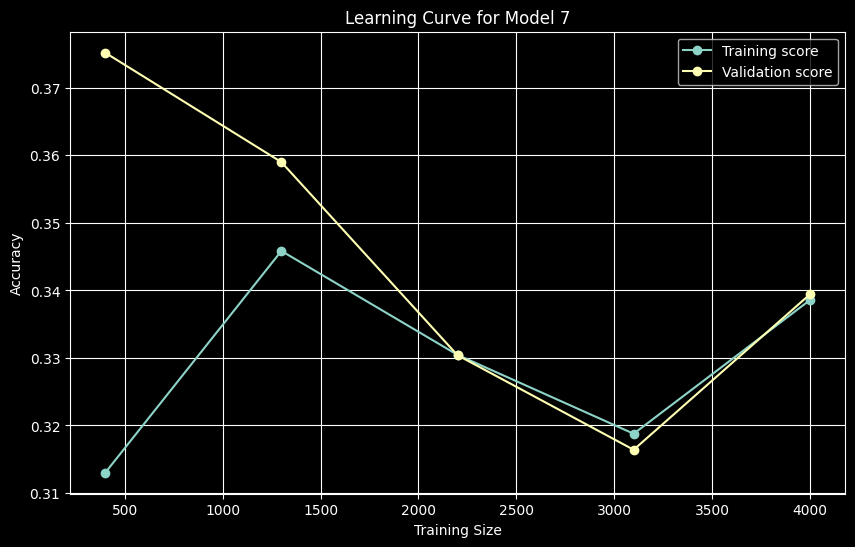

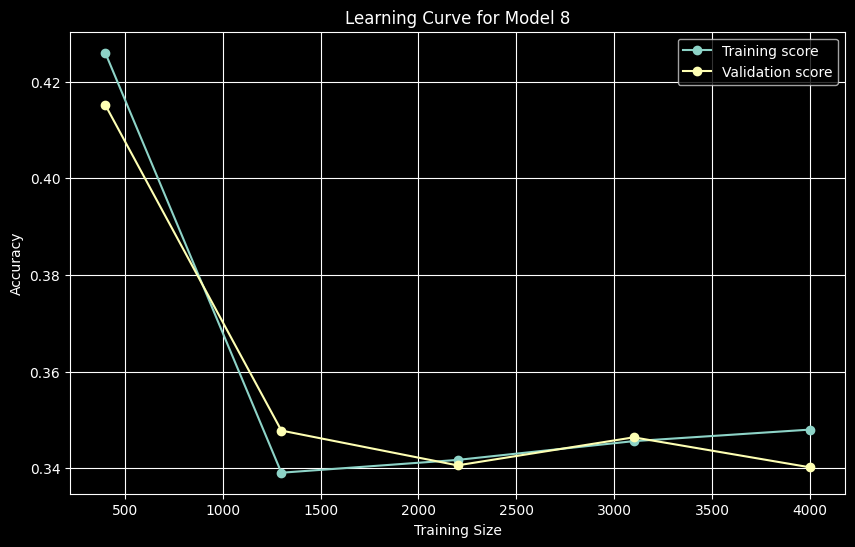

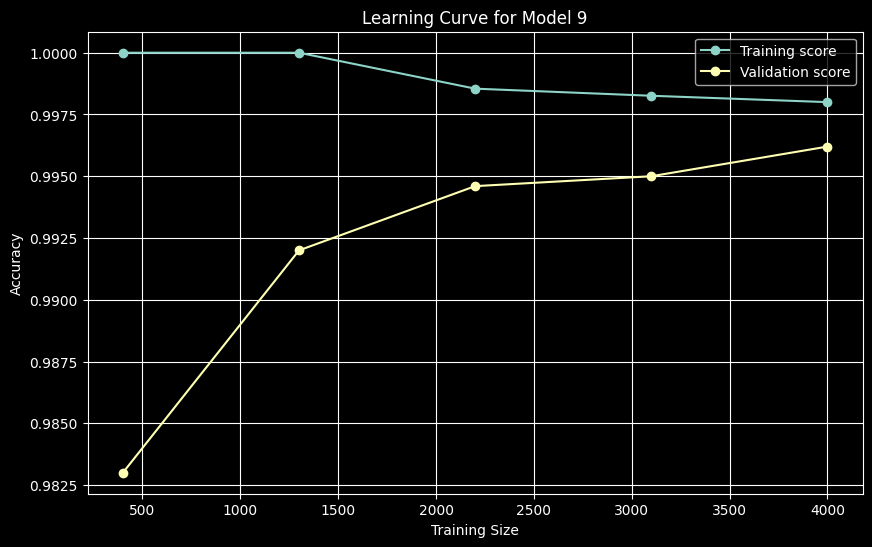

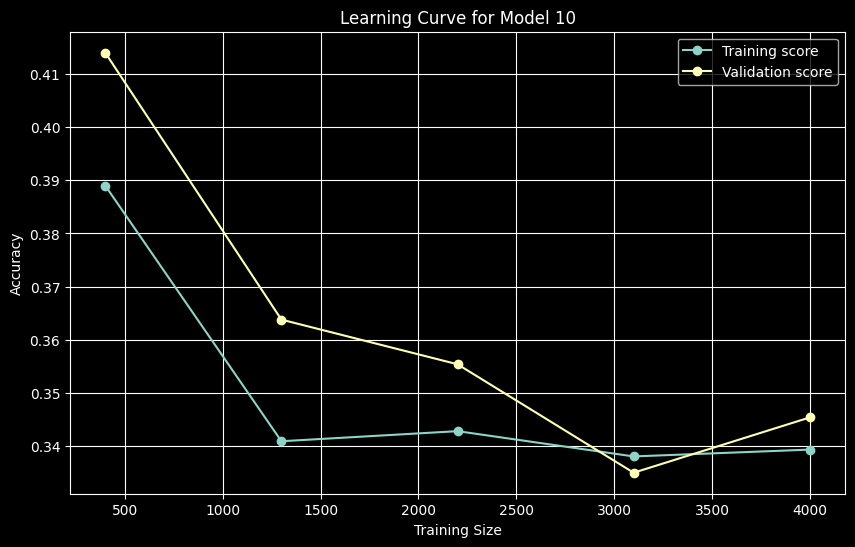

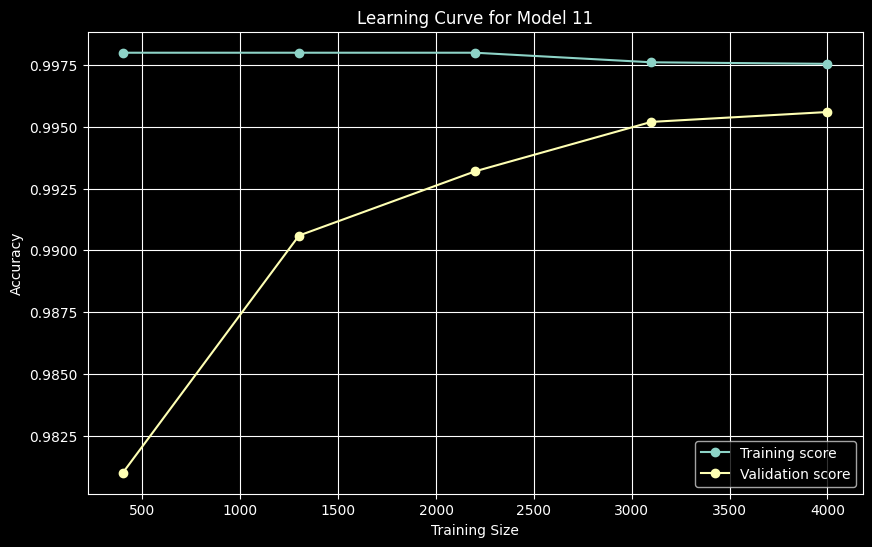

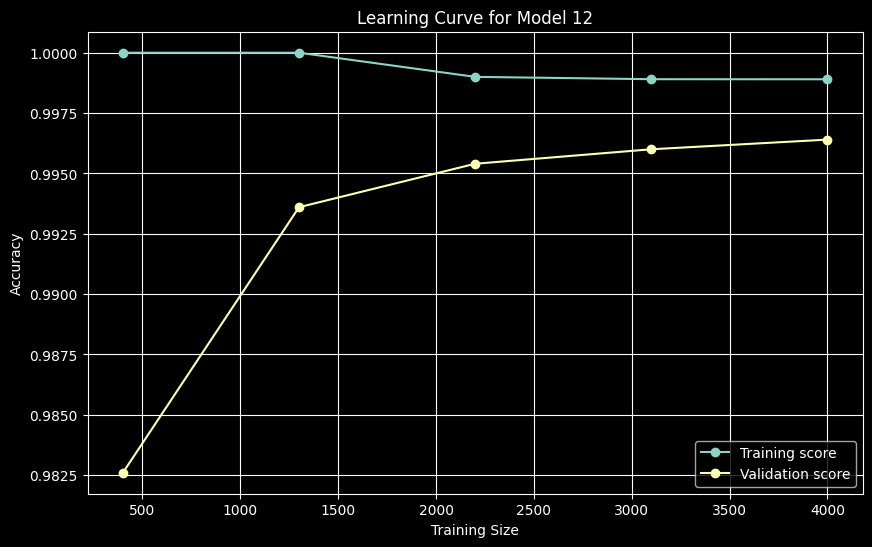

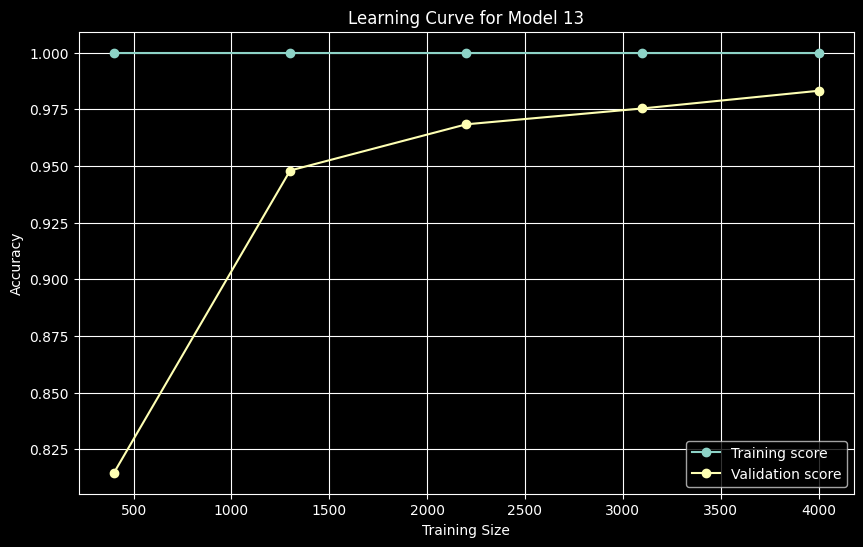

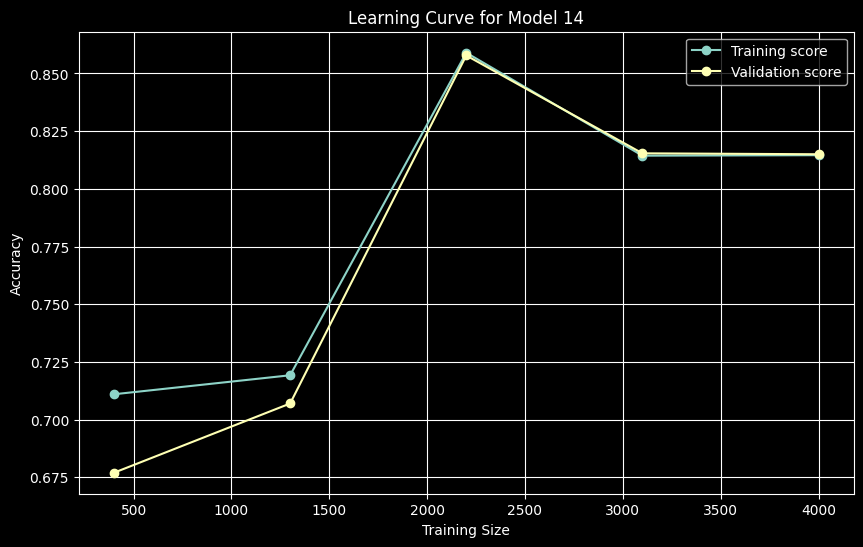

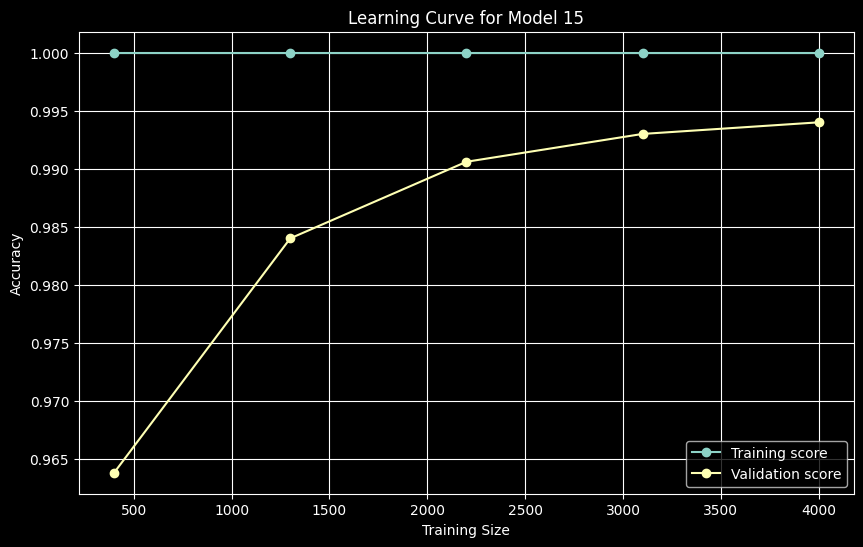

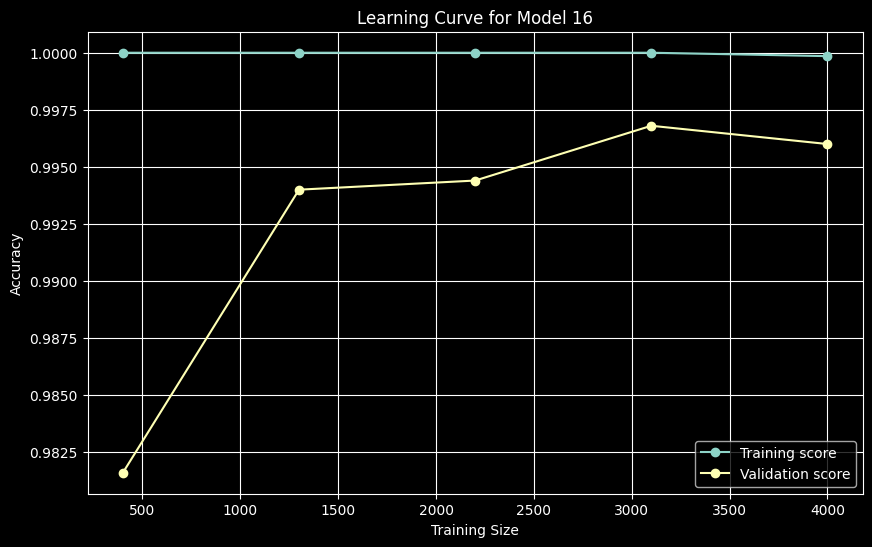

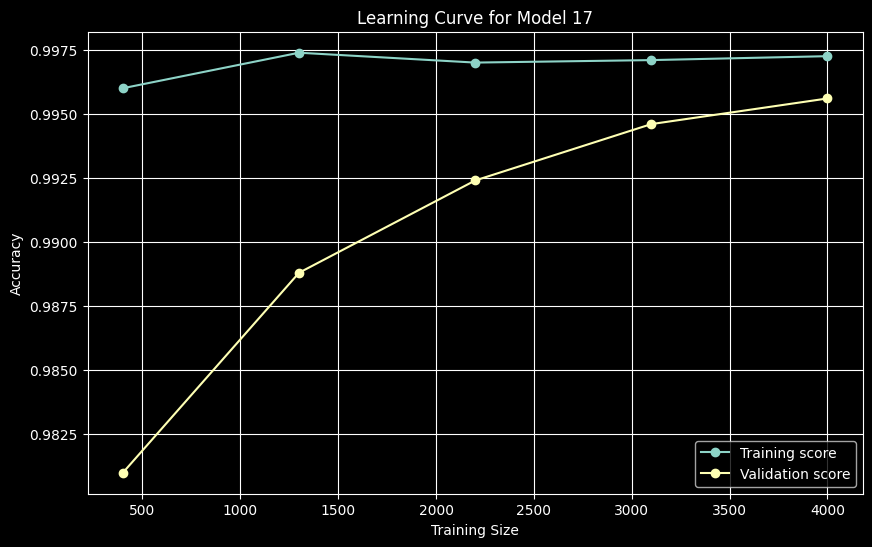

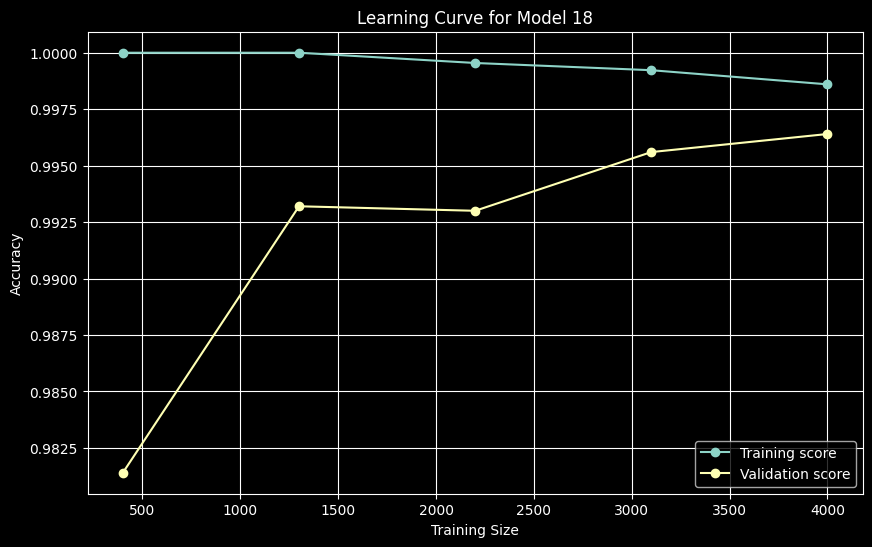

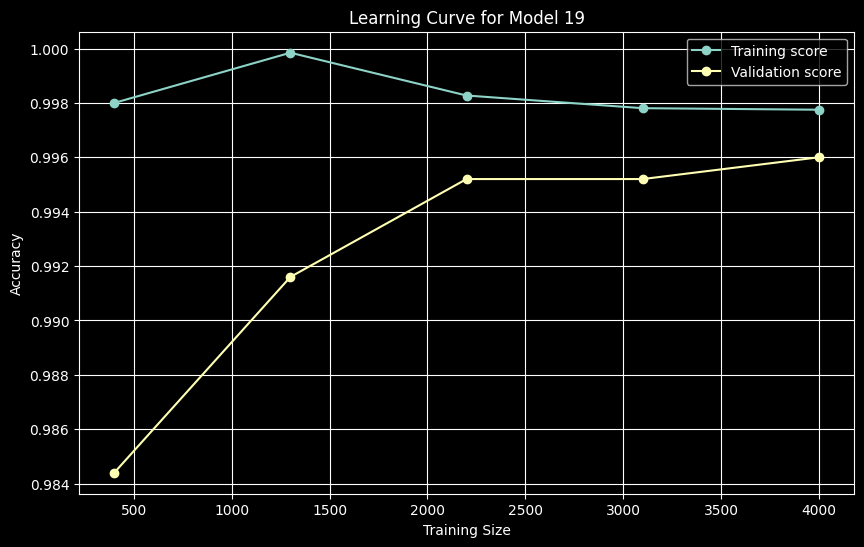

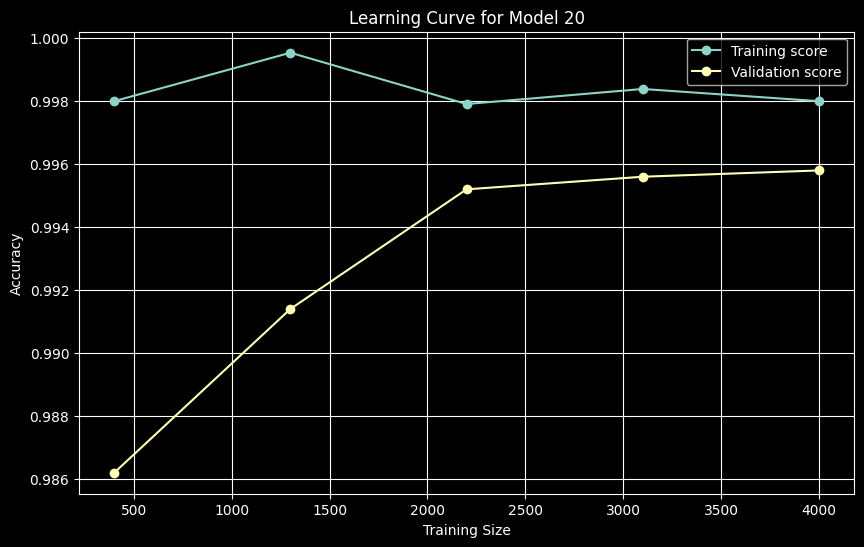

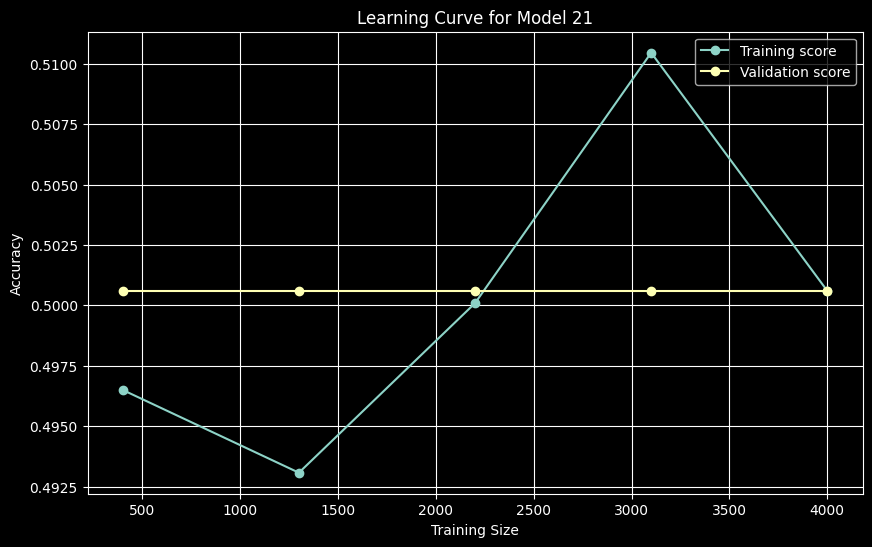

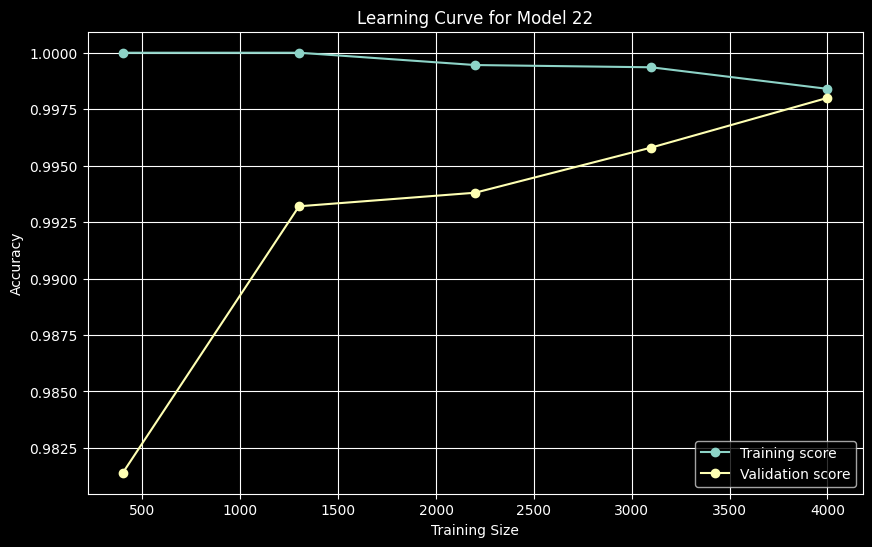

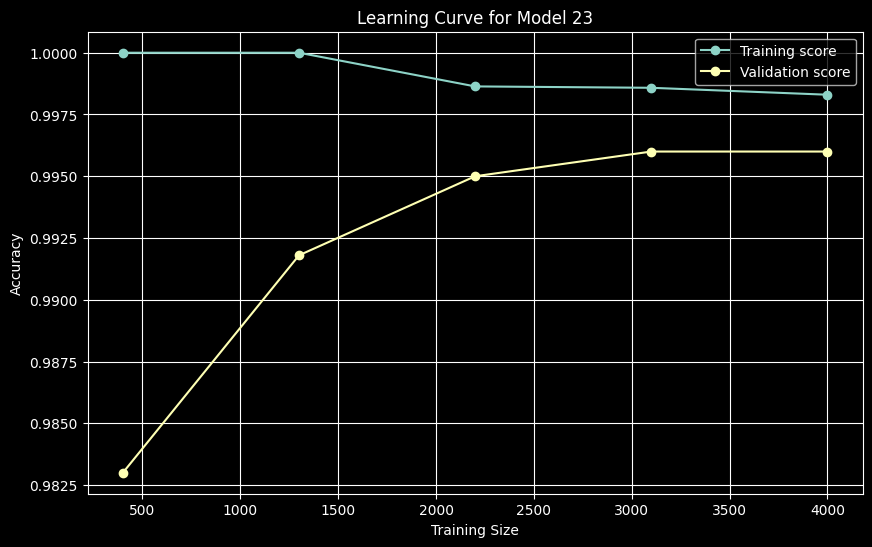

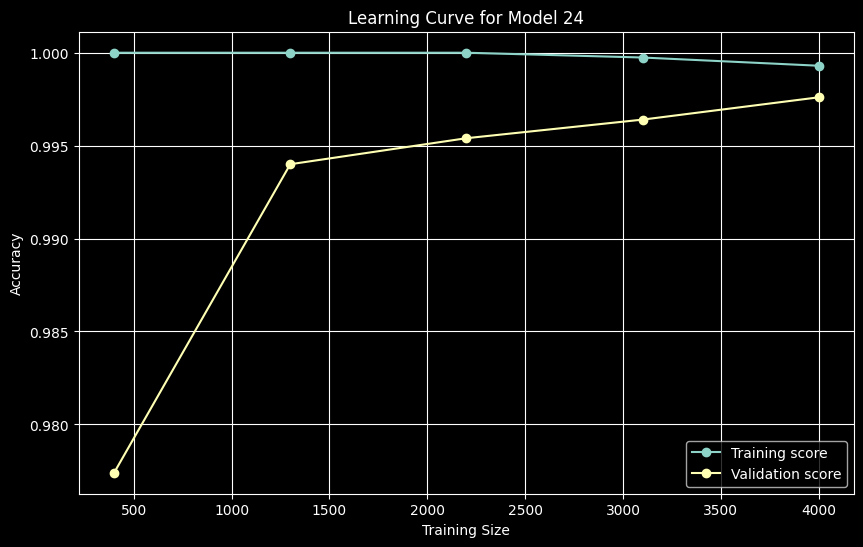

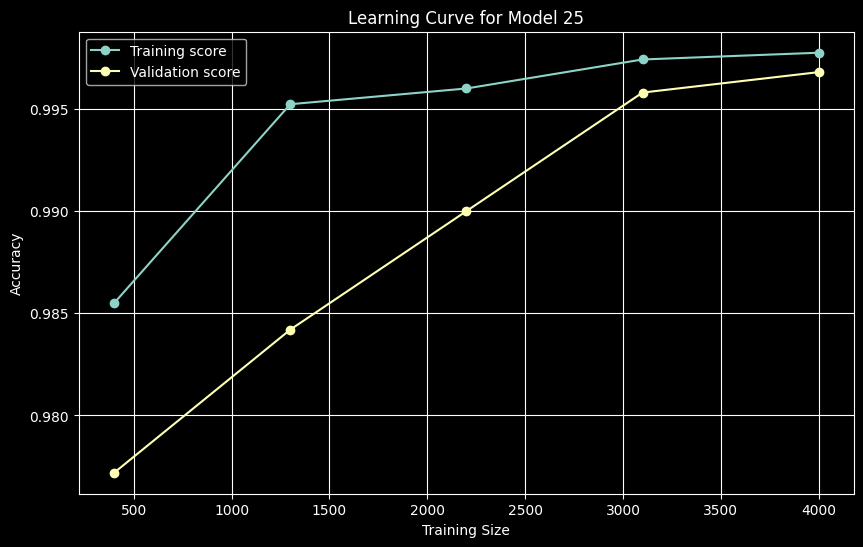

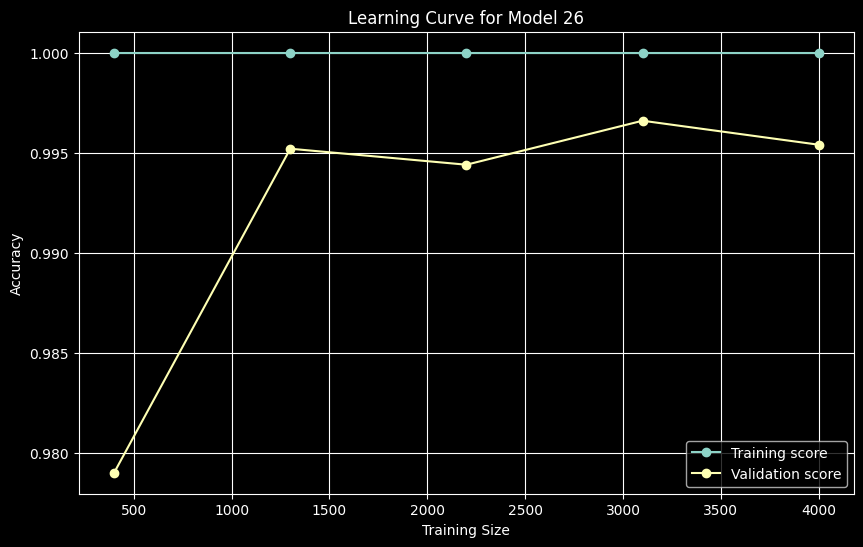

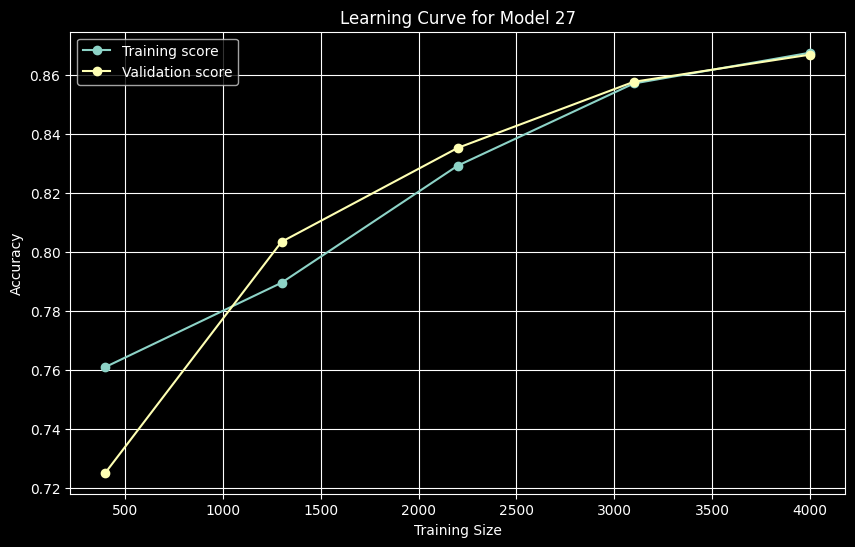

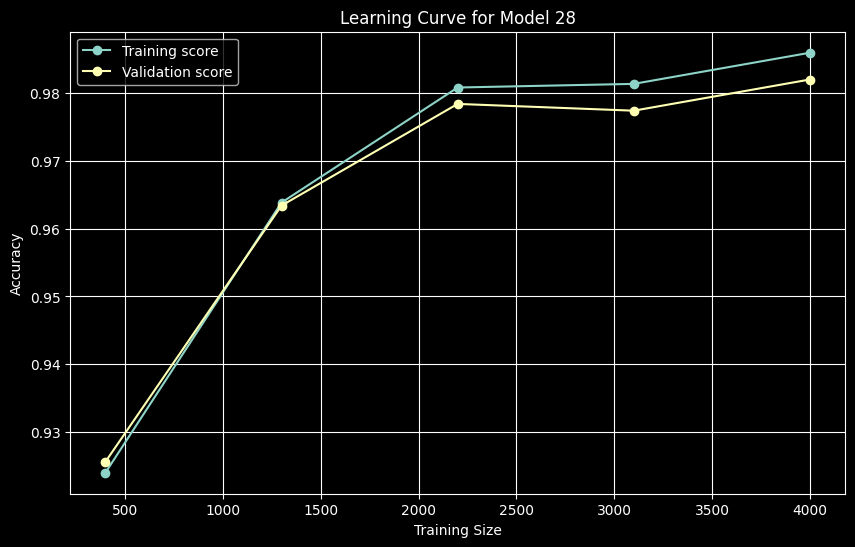

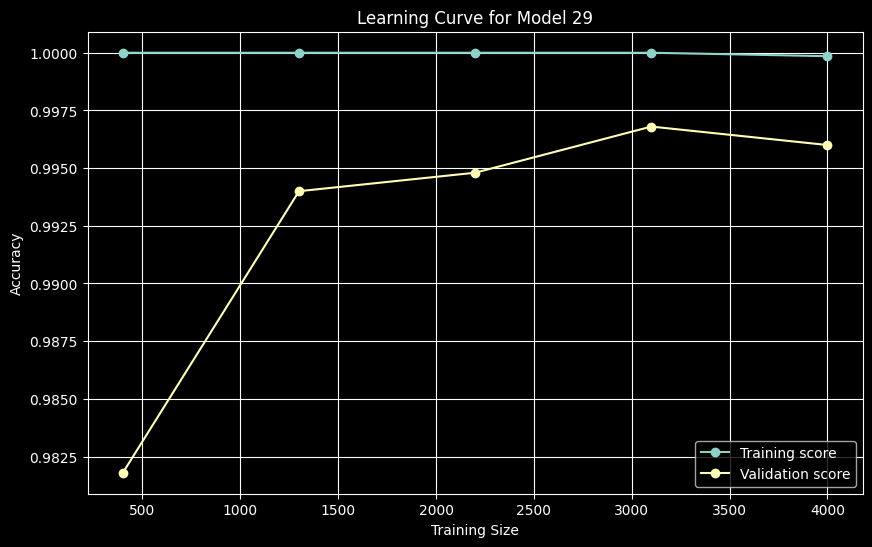

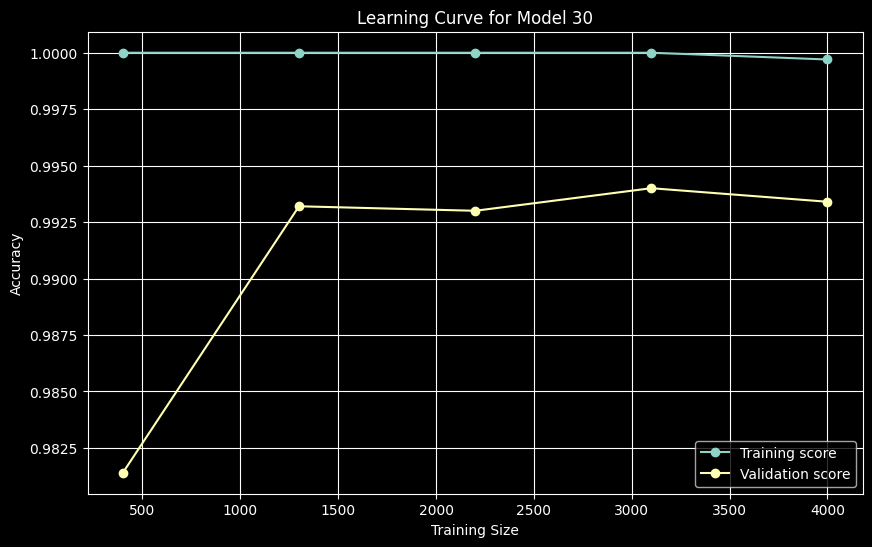

Model 28 has the smallest learning gap of 0.0124
Final accuracy with best model: 0.9853


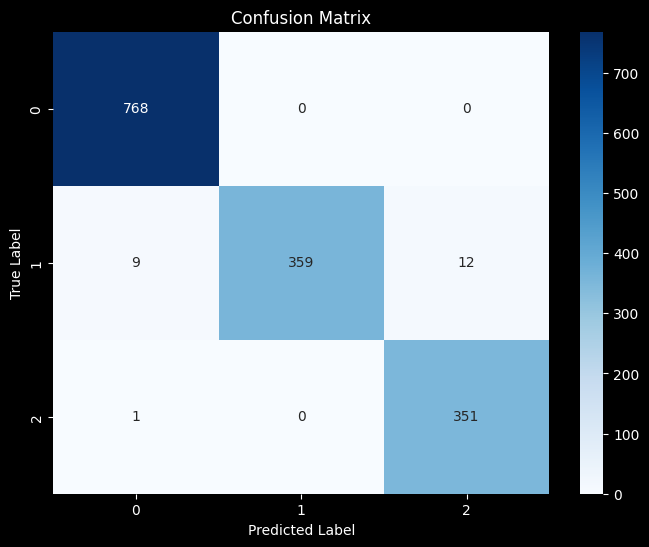

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       768
           1       1.00      0.94      0.97       380
           2       0.97      1.00      0.98       352

    accuracy                           0.99      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [259]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = Final_Data.drop('Cluster', axis=1)
y = Final_Data['Cluster']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def calculate_learning_gap(train_scores, test_scores):
    """Utility function to compute the sum of absolute differences between 
       training and test scores (learning gap).
    """
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    return np.sum(np.abs(train_scores_mean - test_scores_mean))

def plot_learning_curve(estimator, X, y, title):
    """Utility function to plot the learning curve of the given estimator."""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    # Calculate and return the learning gap (difference between training and validation curves)
    return calculate_learning_gap(train_scores, test_scores)

def evaluate_models():
    """Evaluates SVM models and identifies the best one with minimal gap between 
       training and validation curves.
    """
    models = []
    learning_gaps = []

    def objective(trial):
        # Suggest hyperparameters
        C = trial.suggest_float('C', 1e-3, 1e3)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1) if kernel != 'linear' else 'scale'
        degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3

        # Create the SVM model
        model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, random_state=42)
        models.append(model)

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

    # Create an Optuna study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=30)

    # Best parameters for SVM
    print(f"Best parameters: {study.best_params}")
    
    # Evaluate learning curves for each model
    for idx, model in enumerate(models):
        title = f'Learning Curve for Model {idx + 1}'
        learning_gap = plot_learning_curve(model, X, y, title)
        learning_gaps.append(learning_gap)
    
    # Identify model with the smallest learning gap
    best_model_idx = np.argmin(learning_gaps)
    best_model = models[best_model_idx]
    
    print(f"Model {best_model_idx + 1} has the smallest learning gap of {learning_gaps[best_model_idx]:.4f}")

    return best_model

# Evaluate the models and get the best one based on learning gap
best_model = evaluate_models()

# Evaluate on the test set with the best model
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final accuracy with best model: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_final, target_names=[str(label) for label in np.unique(y)])
print("Classification Report:")
print(report)



**_I see that model 28 has optimal learning curve additional to accuarcy_** 

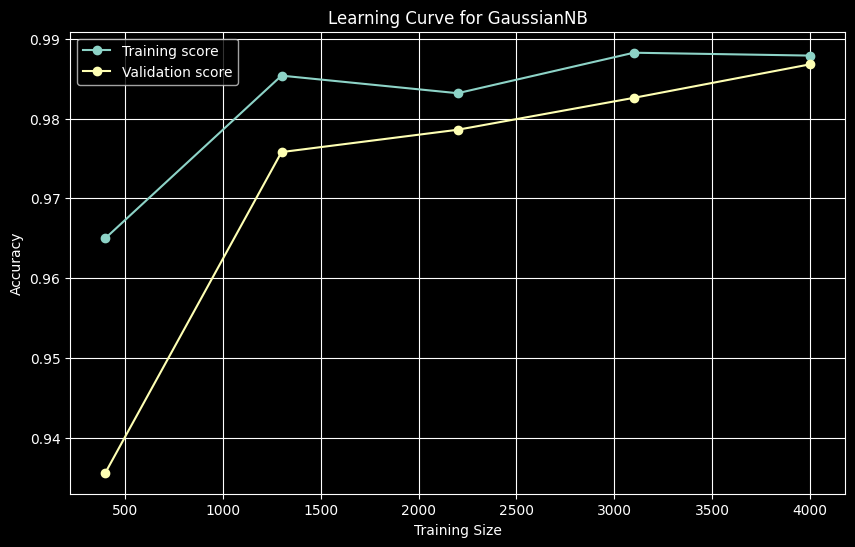

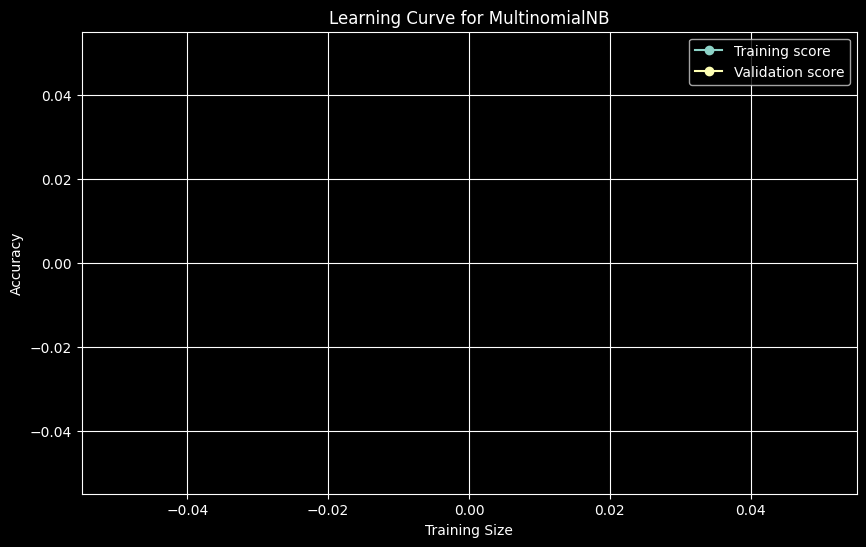

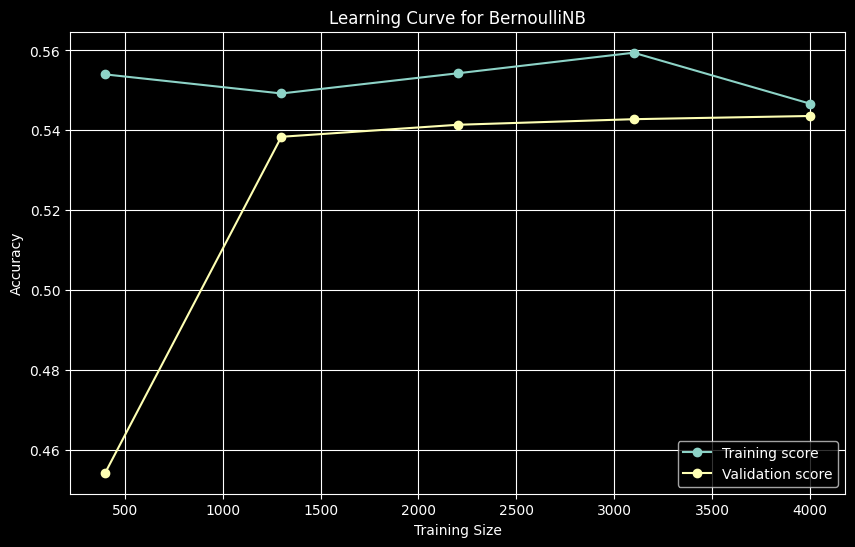

GaussianNB has the smallest learning gap of 0.0503
Final accuracy with best Naive Bayes model: 0.9900


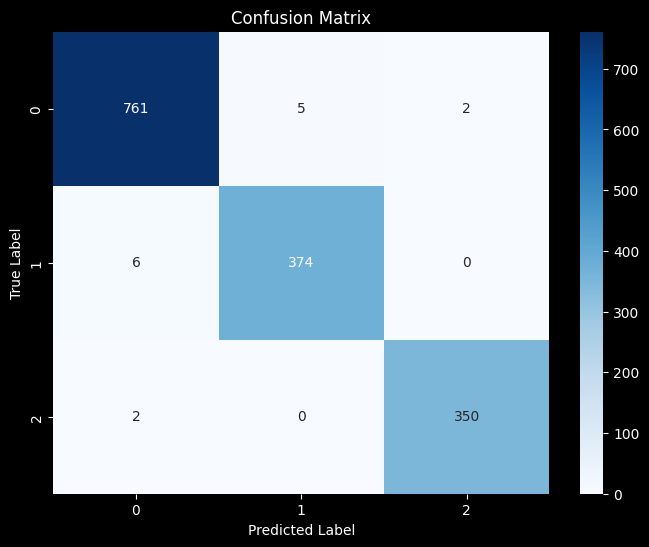

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       768
           1       0.99      0.98      0.99       380
           2       0.99      0.99      0.99       352

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [260]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Utility functions

def calculate_learning_gap(train_scores, test_scores):
    """Utility function to compute the sum of absolute differences between 
       training and test scores (learning gap).
    """
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    return np.sum(np.abs(train_scores_mean - test_scores_mean))

def plot_learning_curve(estimator, X, y, title):
    """Utility function to plot the learning curve of the given estimator."""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    # Calculate and return the learning gap (difference between training and validation curves)
    return calculate_learning_gap(train_scores, test_scores)

def evaluate_naive_bayes_models():
    """Evaluates different Naive Bayes models and identifies the best one with minimal gap between 
       training and validation curves.
    """
    models = [
        ("GaussianNB", GaussianNB()),
        ("MultinomialNB", MultinomialNB()),
        ("BernoulliNB", BernoulliNB())
    ]
    learning_gaps = []

    # Evaluate learning curves for each model
    for name, model in models:
        title = f'Learning Curve for {name}'
        learning_gap = plot_learning_curve(model, X, y, title)
        learning_gaps.append((name, learning_gap))
    
    # Identify model with the smallest learning gap
    best_model_name, smallest_gap = min(learning_gaps, key=lambda x: x[1])
    best_model = next(model for name, model in models if name == best_model_name)
    
    print(f"{best_model_name} has the smallest learning gap of {smallest_gap:.4f}")

    return best_model

# Evaluate the Naive Bayes models and get the best one based on learning gap
best_nb_model = evaluate_naive_bayes_models()

# Train the best model
best_nb_model.fit(X_train, y_train)

# Evaluate on the test set with the best model
y_pred_final = best_nb_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final accuracy with best Naive Bayes model: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_final, target_names=[str(label) for label in np.unique(y)])
print("Classification Report:")
print(report)


# In the unsupervised analysis, Gaussian clustering with PCA achieved a silhouette score of 0.2948 📊, showing decent clustering despite the complexity of the data. On the supervised side, SVM truly shined with an impressive 99% accuracy 💯 and the most balanced learning curve 📈, making it a standout performer.